# Package import

In [2]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import matplotlib.patches as mpatches
import seaborn as sns                            # more plots
sns.set()

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#  Data metrics exploration & choosing any metric for AD. 

# Train & Test data exploration.

# Default data exploration. with multiple field. but using single field at a time.

   load_1min  process_summary_total  cpu_user_pct  memory_actual_used_pct
0      0.020                    141        0.0341                  0.0848
1      0.020                    141        0.0341                  0.0848
2      0.020                    141        0.0341                  0.0848
3      0.015                    141        0.0341                  0.0848
4      0.020                    141        0.0341                  0.0848
20000
0.1825 0.0
AxesSubplot(0.125,0.125;0.775x0.755)


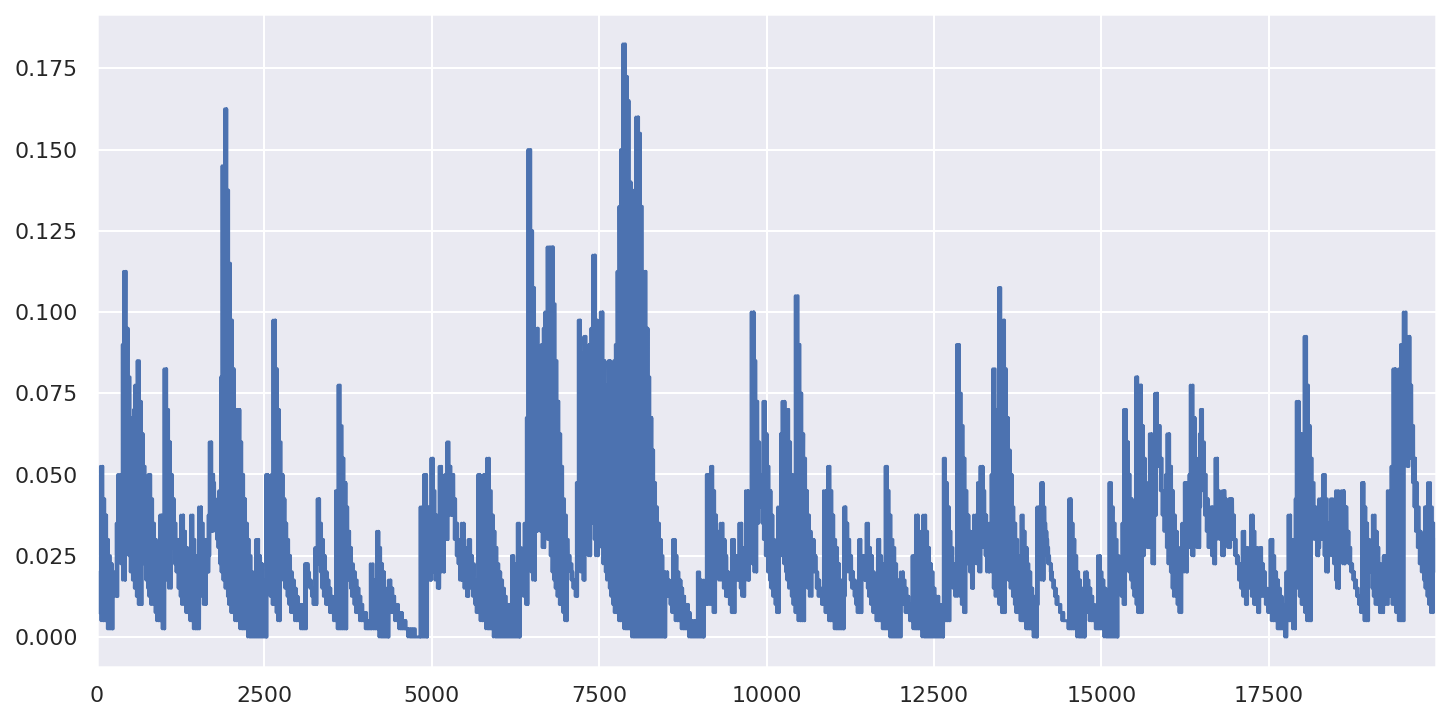

In [31]:
df = pd.read_csv('./prediction_final_four/data/input.csv',skiprows=[1,2])
print(df.head())
print(len(df))
print(df.load_1min.max(),df.load_1min.min())
print(df.load_1min.plot(figsize=(12,6)))

   load_1min  process_summary_total  cpu_user_pct  memory_actual_used_pct  \
0        141                 0.0200        0.0341                  0.0848   
1        141                 0.0150        0.0341                  0.0848   
2        141                 0.0200        0.0341                  0.0848   
3        141                 0.0200        0.0341                  0.0848   
4        194                 0.0075        0.0501                  0.6486   

   prediction  anomaly_score  anomaly_likelihood  
0      0.0200            1.0                 0.5  
1      0.0200            0.0                 0.5  
2      0.0185            0.0                 0.5  
3      0.0200            0.0                 0.5  
4      0.0200            0.0                 0.5  
19998
0.1825 0.0
AxesSubplot(0.125,0.125;0.775x0.755)


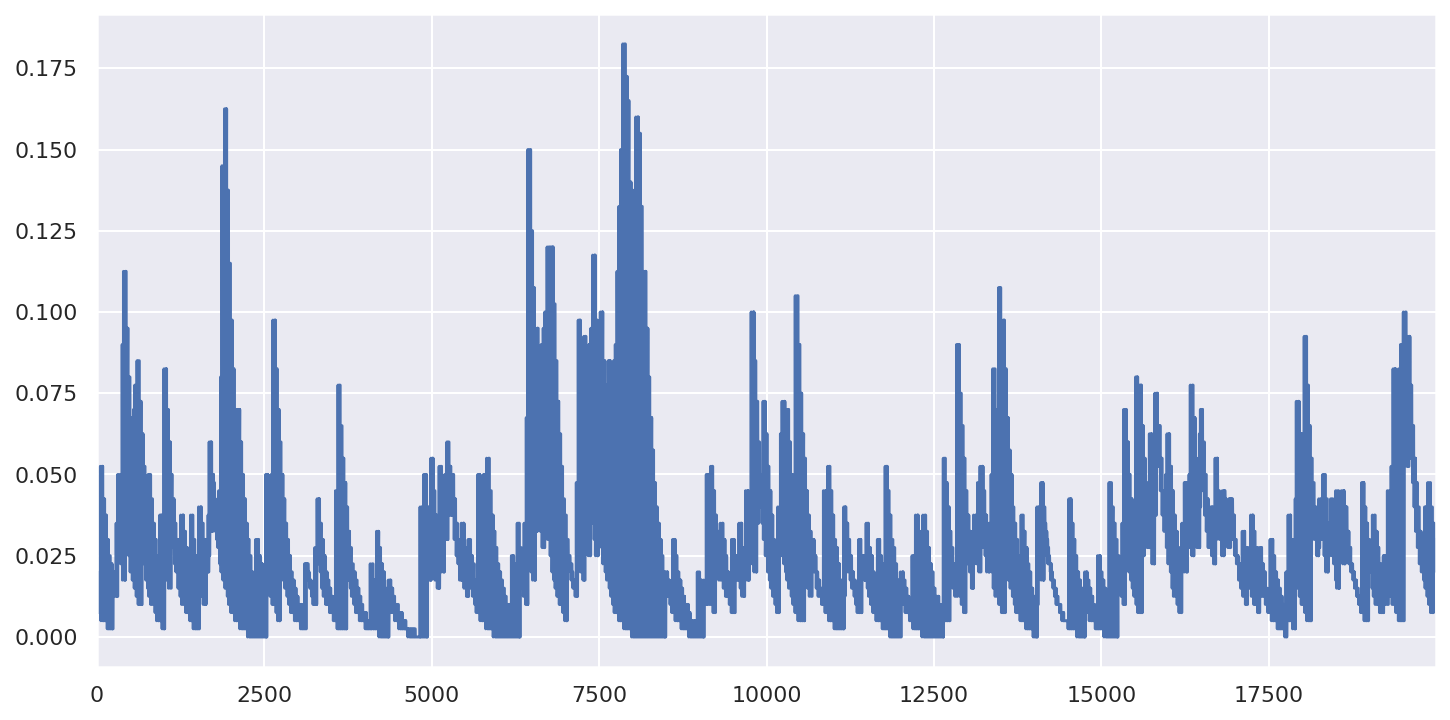

In [34]:
df = pd.read_csv('./anomaly_final_four/data/output.csv',skiprows=[1,2])
print(df.head())
print(len(df))
# here column order got misplaced. by looking at data, process_summary_total looks hold load_1min field's data.
# so using process_summary_total fields data.
print(df.process_summary_total.max(),df.process_summary_total.min())
print(df.process_summary_total.plot(figsize=(12,6)))

In [35]:
non_anom = df[df['anomaly_likelihood']<=0.99999]['process_summary_total']
anom = df[df['anomaly_likelihood']>0.99999]['process_summary_total']

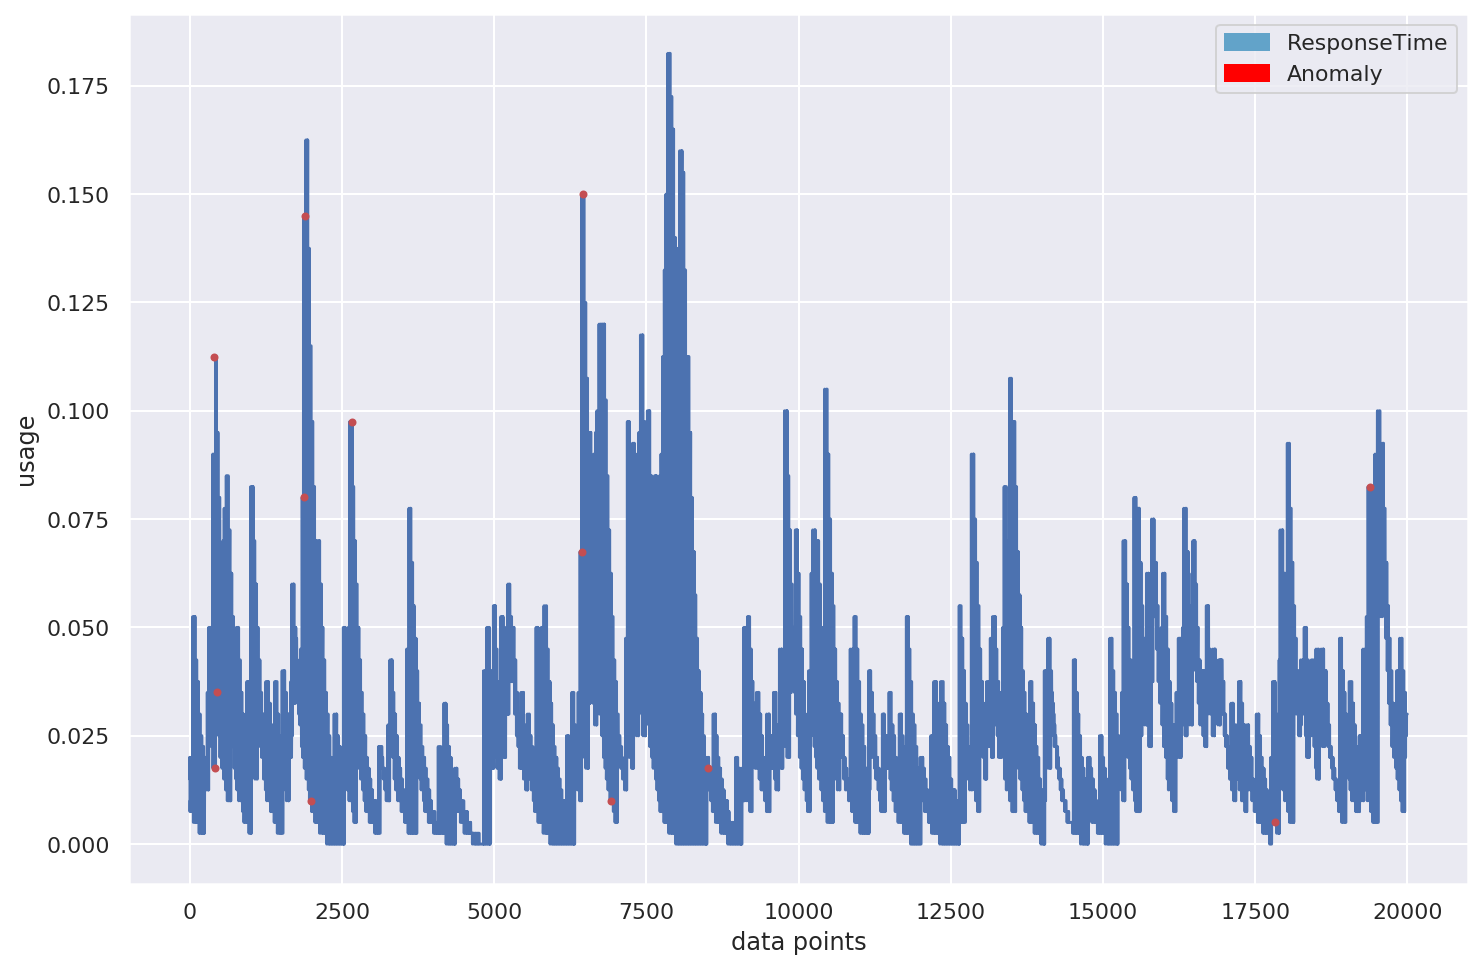

In [36]:
plt.figure(figsize = (12,8))
plt.plot(non_anom, linestyle = '-', label ='ResponseTime')
plt.plot(anom, 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('usage')
plt.xlabel('data points')
plt.show()

# Default data exploration with single field.

   load_1min
0      0.020
1      0.020
2      0.020
3      0.015
4      0.020
20000
0.1825 0.0
AxesSubplot(0.125,0.125;0.775x0.755)


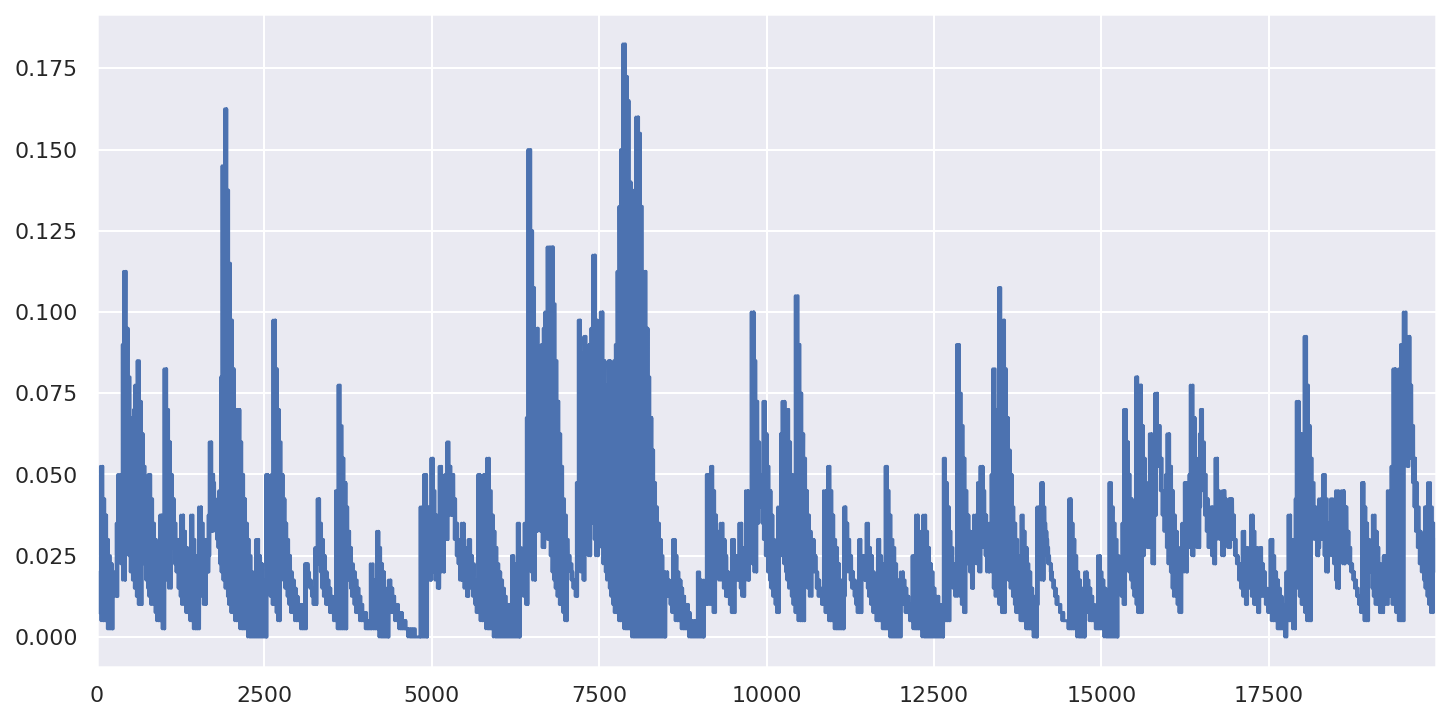

In [38]:
df1 = pd.read_csv('./prediction_final_four/data/try_load1min.csv',skiprows=[1,2])
print(df1.head())
print(len(df1))
print(df1.load_1min.max(),df1.load_1min.min())
print(df1.load_1min.plot(figsize=(12,6)))

In [39]:
df1 = pd.read_csv('./anomaly_final_four/data/try_load1min_val_out.csv')
df1.index= pd.to_datetime(df1.index)
df1.sort_index(ascending=True, inplace=True)
df1.head()

actual_value  prediction  anomaly_score  \
2018-11-15 11:49:01        0.0525      0.0525           0.05   
2018-11-15 11:49:01        0.0400      0.0400           0.15   
2018-11-15 11:49:01        0.0400      0.0400           0.15   
2018-11-15 11:49:01        0.0525      0.0525           0.20   
2018-11-15 11:49:01        0.0400      0.0400           0.15   

                     anomaly_likelihood  
2018-11-15 11:49:01            0.673366  
2018-11-15 11:49:01            0.665121  
2018-11-15 11:49:01            0.647550  
2018-11-15 11:49:01            0.623630  
2018-11-15 11:49:01            0.593058

In [40]:
non_anom = df1[df1['anomaly_likelihood']<=0.99999]['actual_value']
anom = df1[df1['anomaly_likelihood']>0.99999]['actual_value']

In [41]:
#anom.head()
print(df1['anomaly_likelihood'].max(),df1['anomaly_likelihood'].min(),df1['anomaly_likelihood'].mean())
print(len(df1),len(non_anom),len(anom))

0.9999999990147977 0.5 0.7376055933590747
24998 24972 26


In [42]:
df1[df1['anomaly_likelihood']>0.99999].head()

actual_value  prediction  anomaly_score  \
2018-11-15 12:05:51        0.0250      0.0250            1.0   
2018-11-15 12:05:51        0.4250      0.4250            1.0   
2018-11-15 12:09:10        0.1425      0.1425            0.6   
2018-11-15 12:09:50        0.3625      0.3625            1.0   
2018-11-15 12:10:30        0.4450      0.4450            1.0   

                     anomaly_likelihood  
2018-11-15 12:05:51            0.999999  
2018-11-15 12:05:51            0.999999  
2018-11-15 12:09:10            0.999998  
2018-11-15 12:09:50            1.000000  
2018-11-15 12:10:30            1.000000

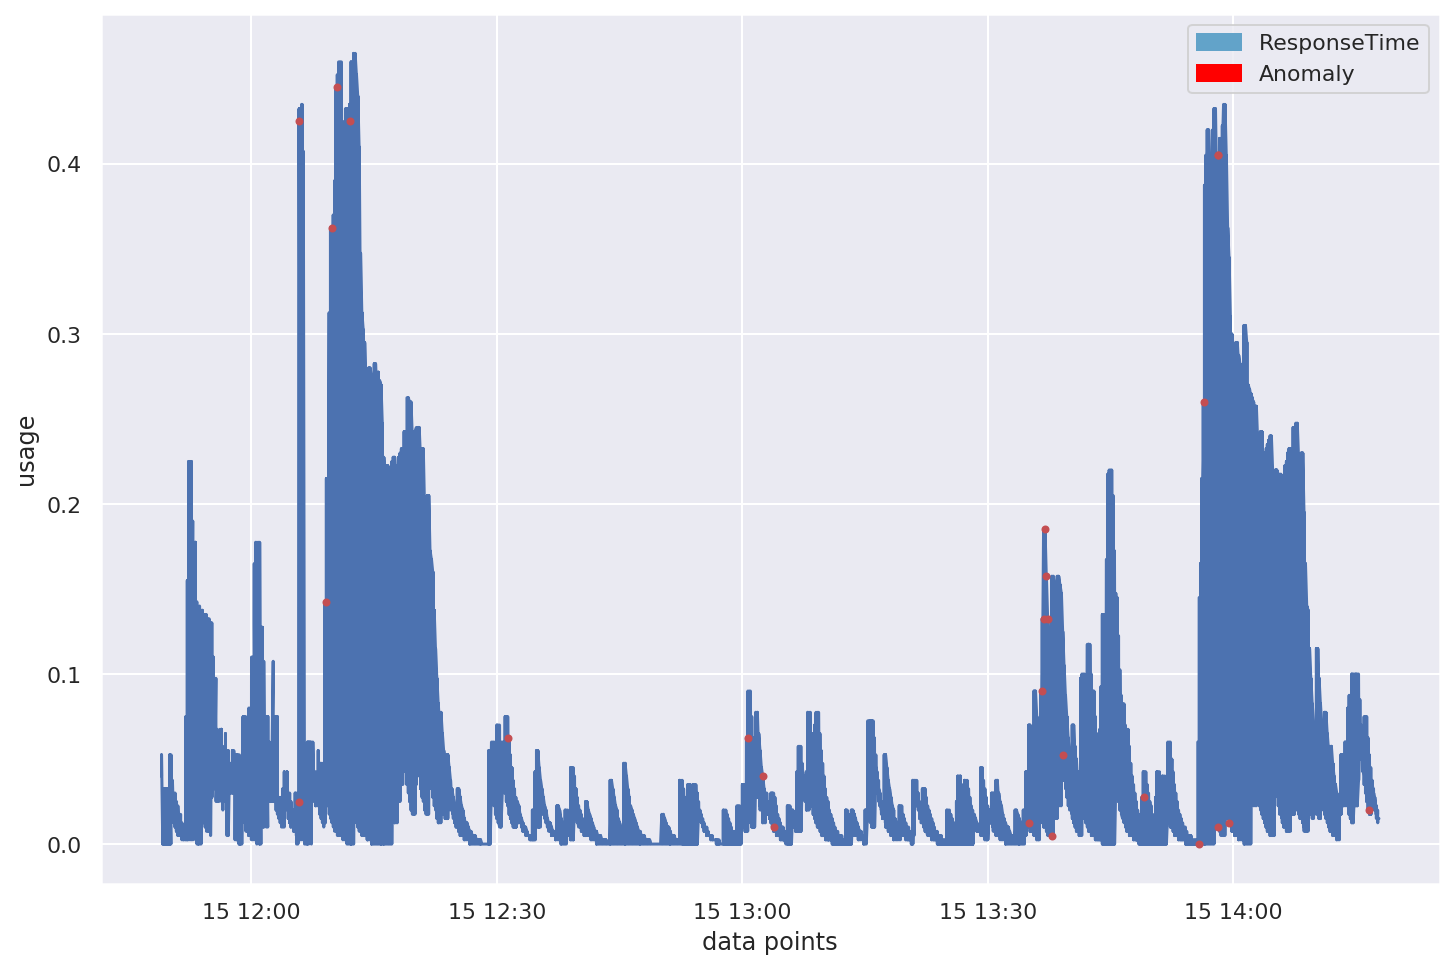

In [43]:
plt.figure(figsize = (12,8))
plt.plot(non_anom, linestyle = '-', label ='ResponseTime')
plt.plot(anom, 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('usage')
plt.xlabel('data points')
plt.show()

# More Insights

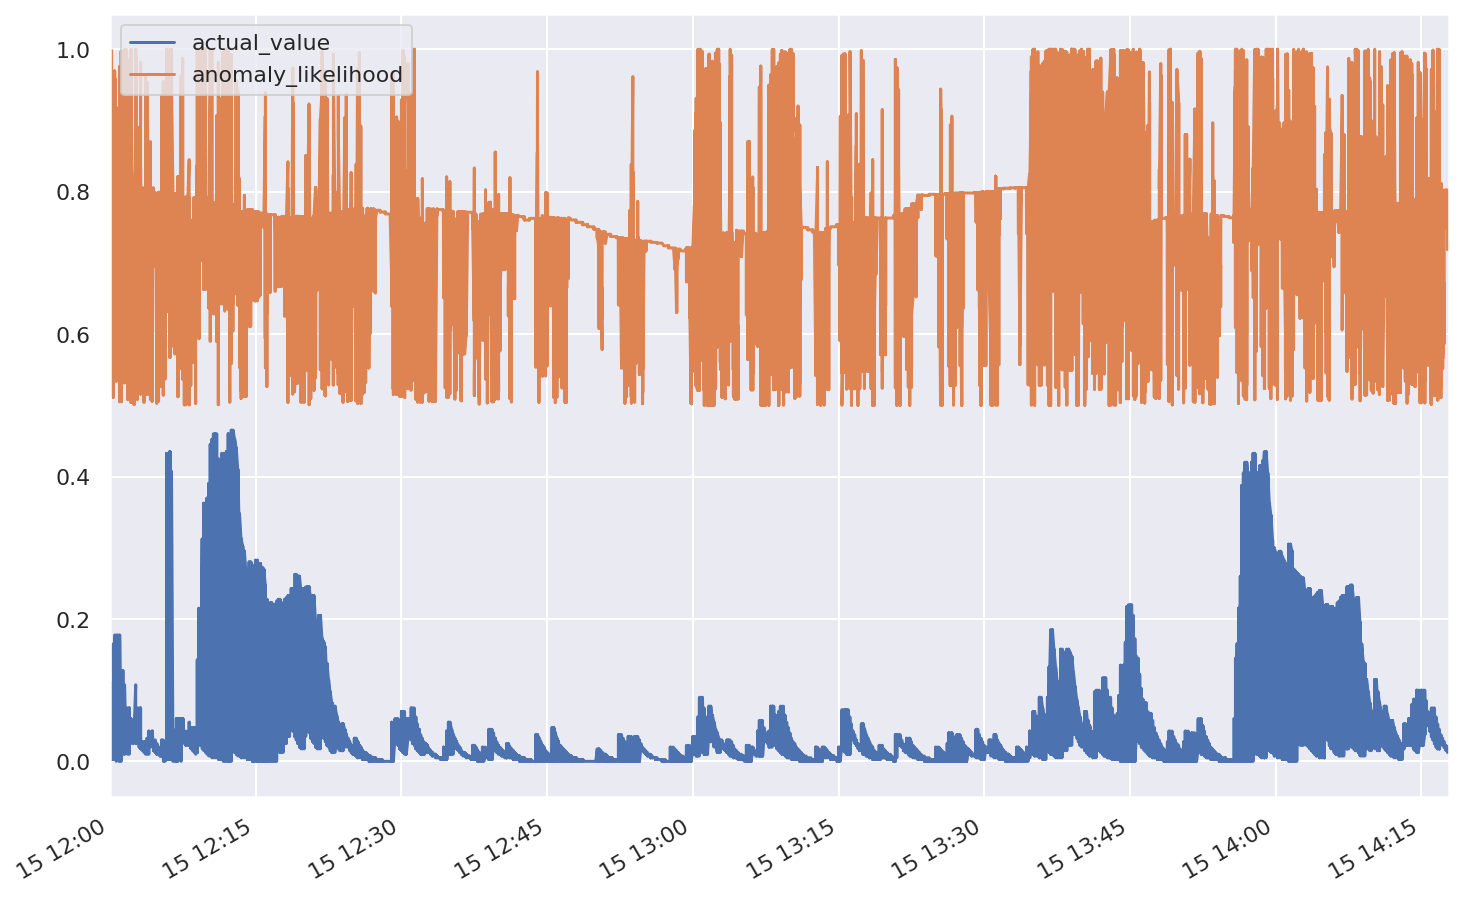

In [44]:
df1.loc['2018-11-15 12:00':'2018-11-15 14:30'][['actual_value','anomaly_likelihood']].plot(figsize=(12,8))

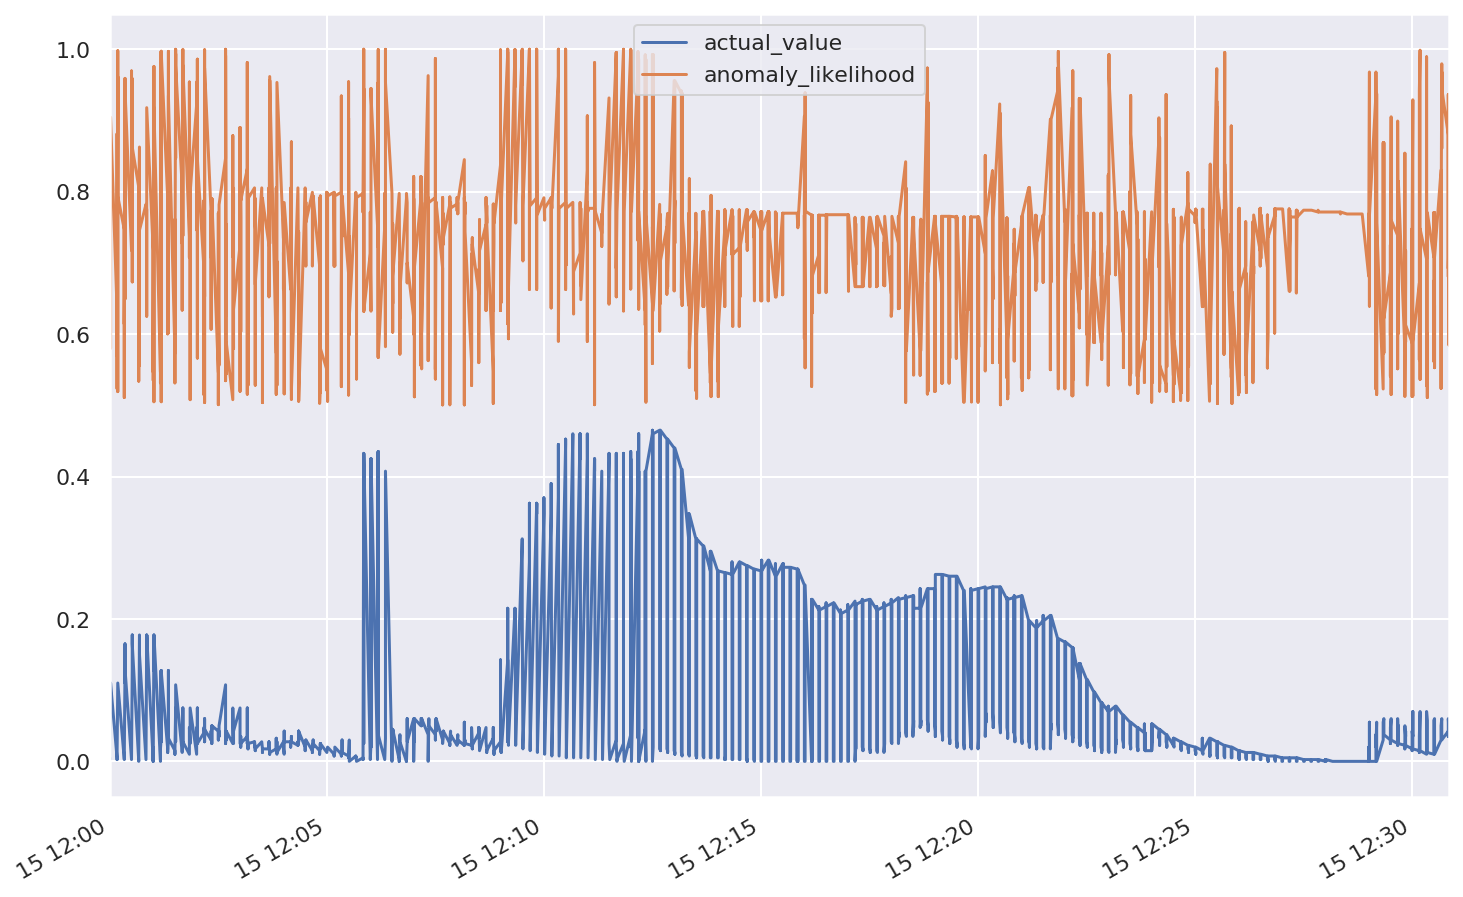

In [45]:
df1.loc['2018-11-15 12:00':'2018-11-15 12:30'][['actual_value','anomaly_likelihood']].plot(figsize=(12,8))

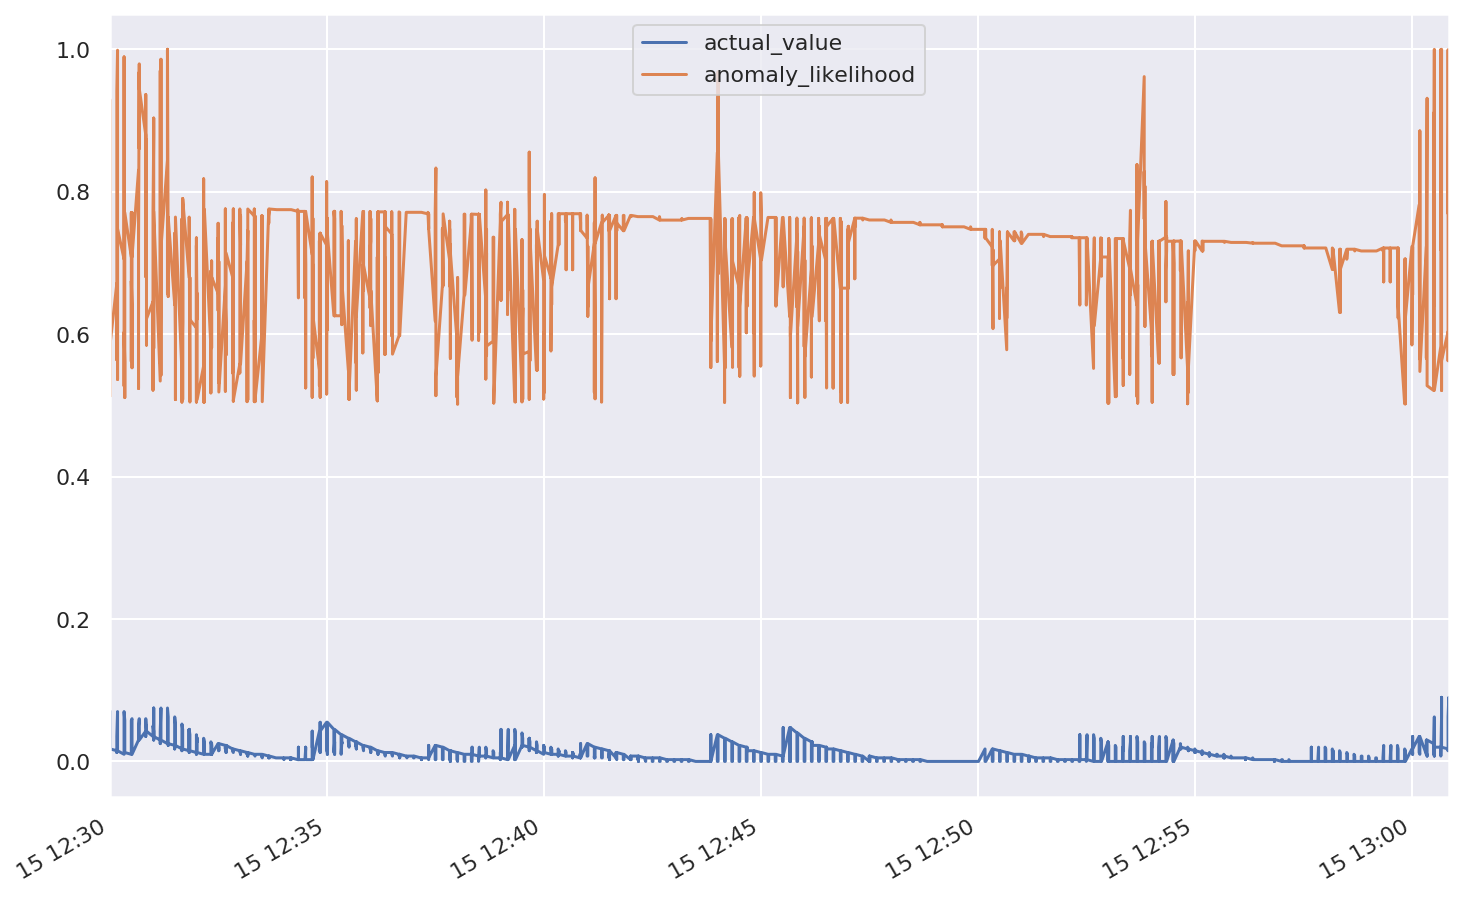

In [46]:
df1.loc['2018-11-15 12:30':'2018-11-15 13:00'][['actual_value','anomaly_likelihood']].plot(figsize=(12,8))

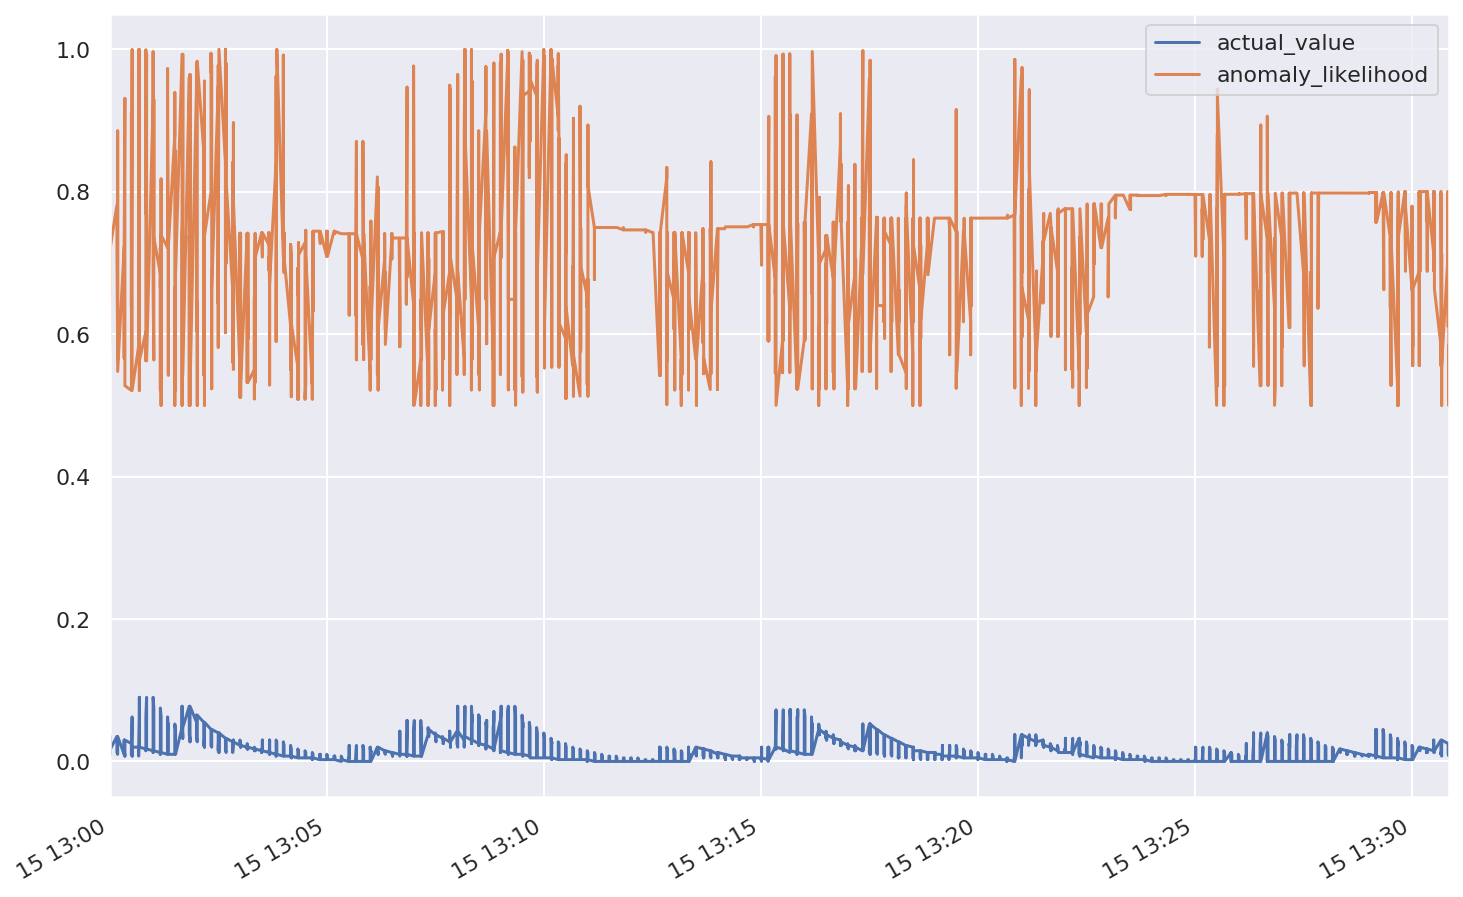

In [47]:
df1.loc['2018-11-15 13:00':'2018-11-15 13:30'][['actual_value','anomaly_likelihood']].plot(figsize=(12,8))

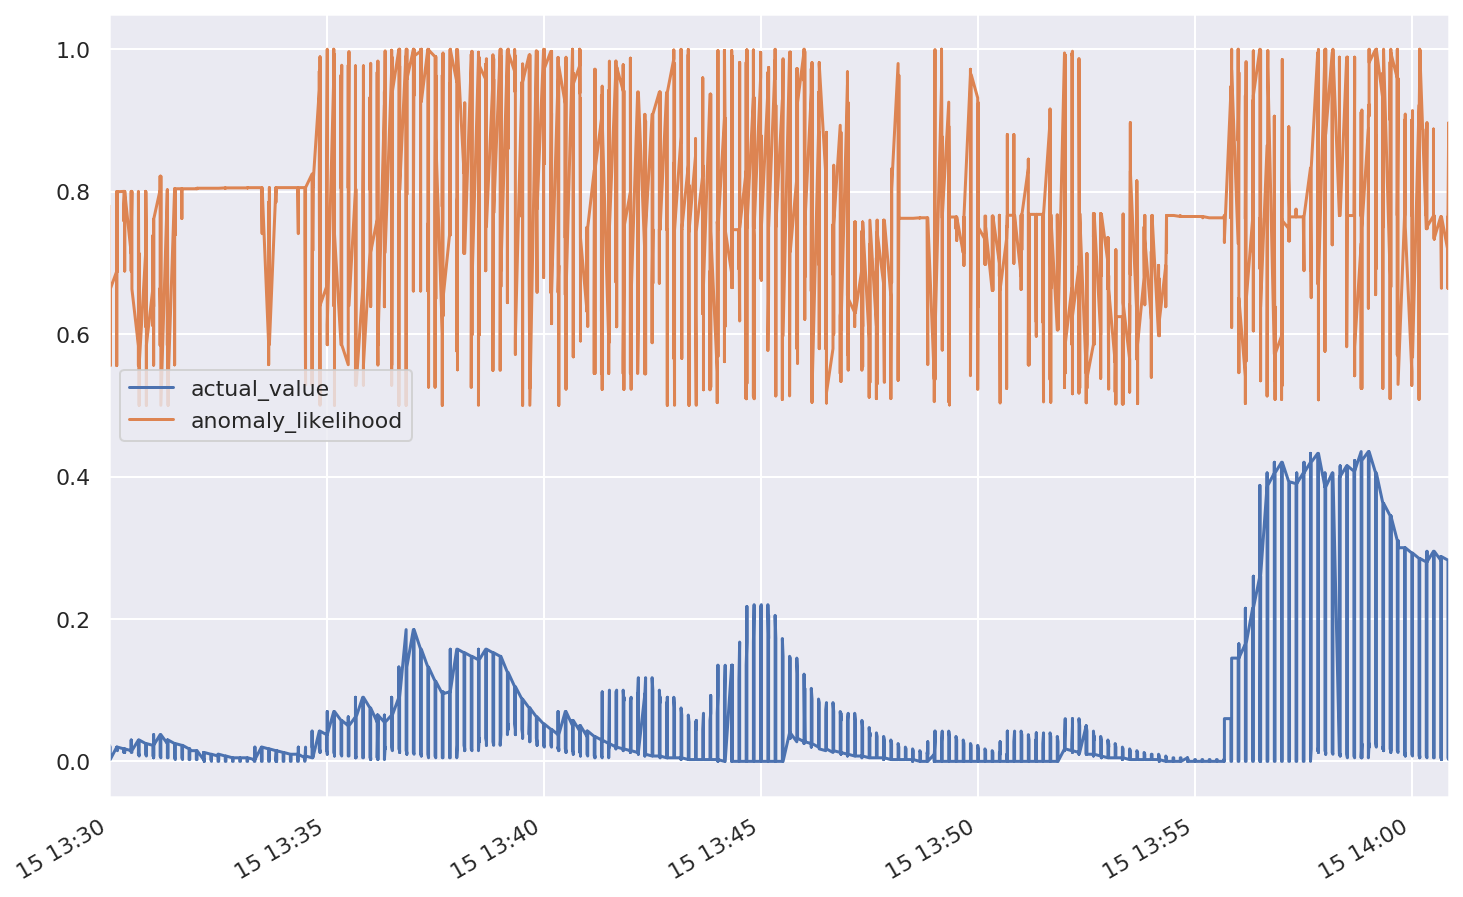

In [48]:
df1.loc['2018-11-15 13:30':'2018-11-15 14:00'][['actual_value','anomaly_likelihood']].plot(figsize=(12,8))

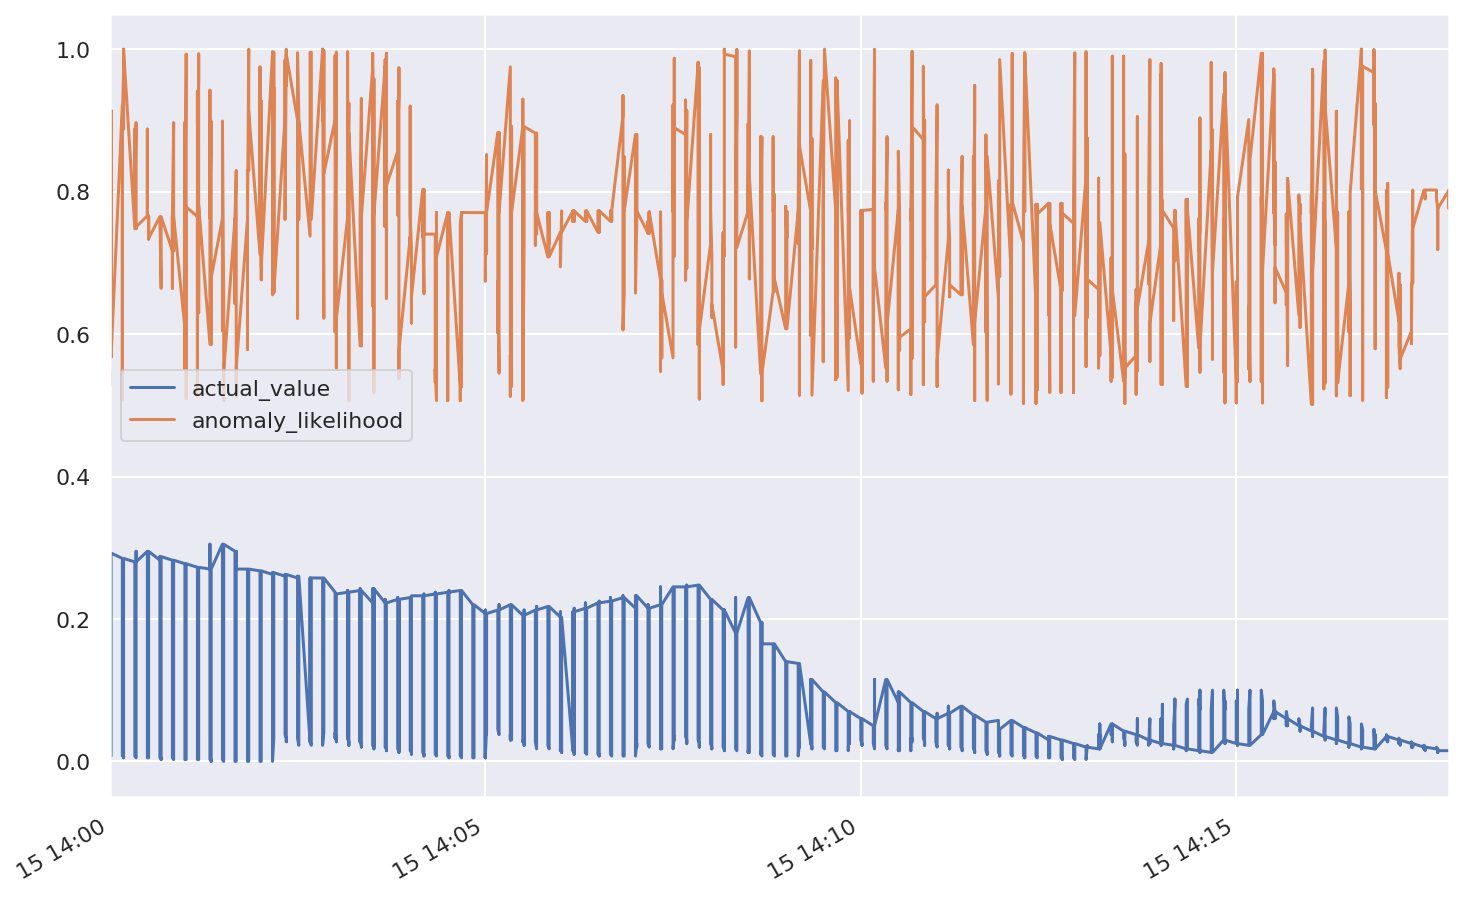

In [49]:
df1.loc['2018-11-15 14:00':'2018-11-15 14:30'][['actual_value','anomaly_likelihood']].plot(figsize=(12,8))

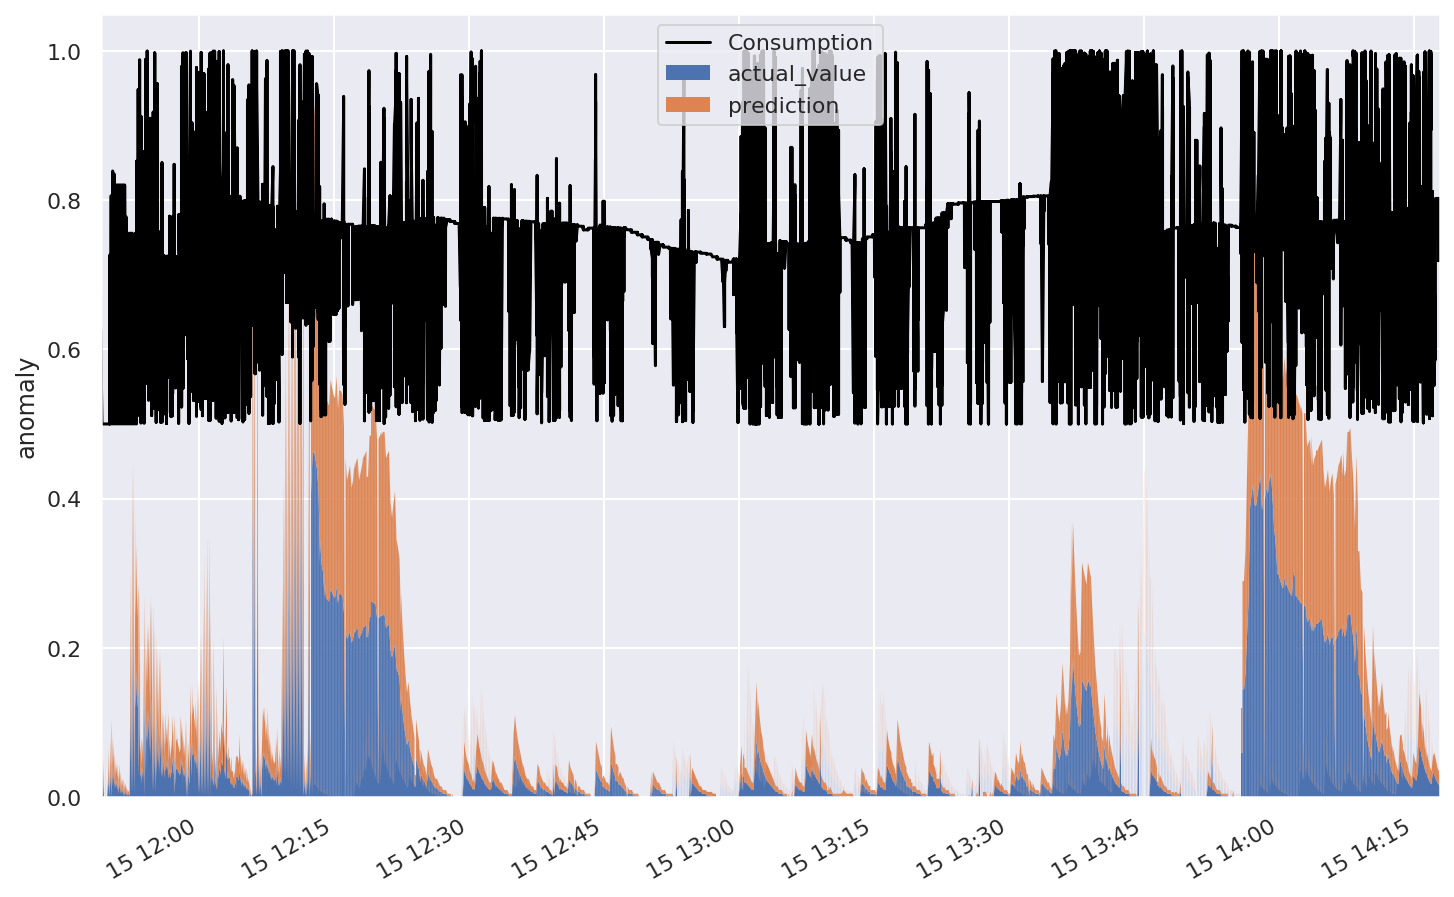

In [50]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df1['anomaly_likelihood'], color='black', label='Consumption')
df1[['actual_value', 'prediction']].plot.area(ax=ax, linewidth=0)
#ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('anomaly');

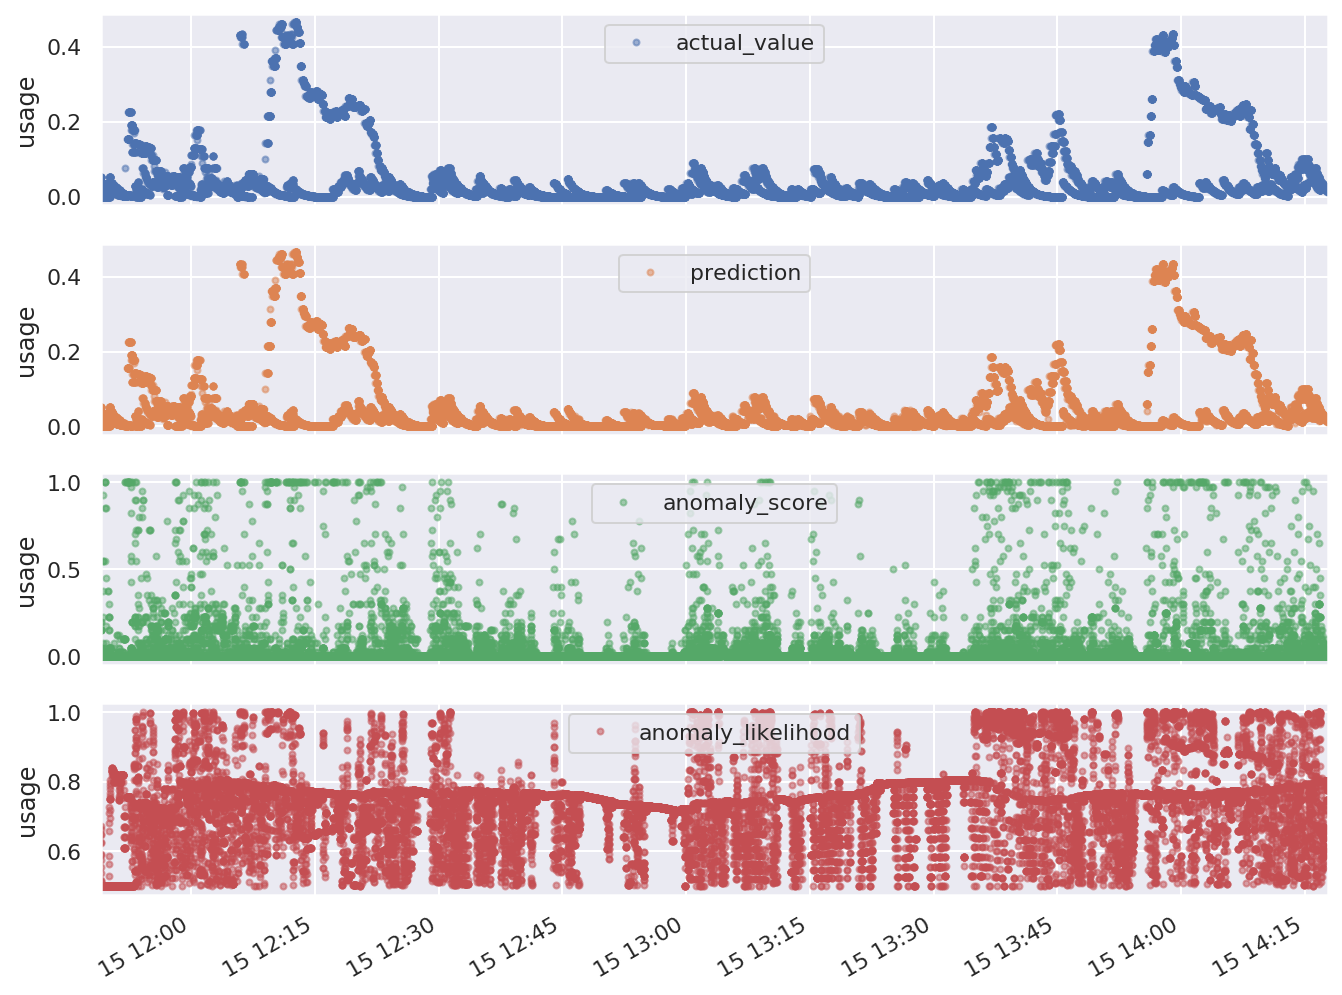

In [51]:
cols_plot = ['actual_value', 'prediction', 'anomaly_score', 'anomaly_likelihood']
axes = df1[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('usage')

# Custom Data Exploration

                                          timestamp  load_1min
timestamp                                                     
2019-01-28 08:56:15.556  2019-01-28 08:56:15.556000     0.1713
2019-01-28 08:56:15.556  2019-01-28 08:56:15.556000     0.1713
2019-01-28 08:56:25.551  2019-01-28 08:56:25.551000     0.1713
2019-01-28 08:56:25.551  2019-01-28 08:56:25.551000     0.1650
2019-01-28 08:56:25.554  2019-01-28 08:56:25.554000     0.1713
AxesSubplot(0.125,0.2;0.775x0.68)


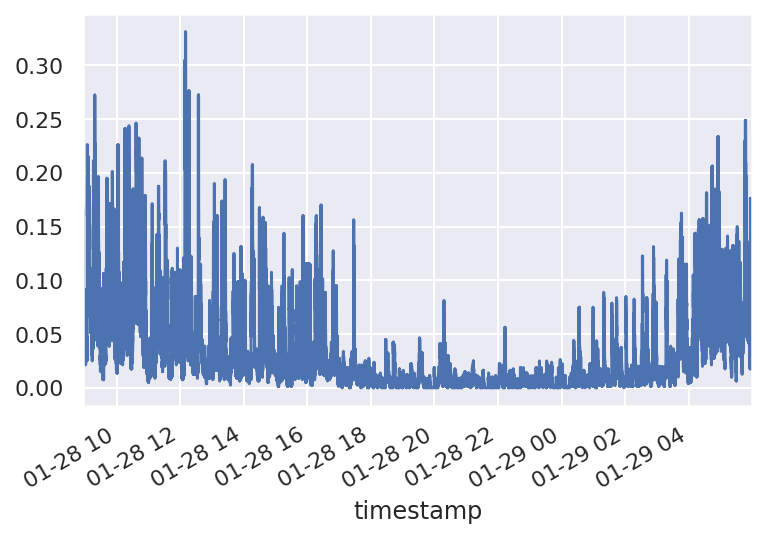

In [52]:
df1 = pd.read_csv('./prediction_final_four/data/load_1min_train_83k_try.csv',skiprows=[1,2])
df1.index = pd.to_datetime(df1.timestamp)
df1.sort_index(ascending=True, inplace=True)
print(df1.head())
print(df1.load_1min.plot())

# Explore resulted AD on test data.

In [7]:
df11 = pd.read_csv('./anomaly_final_four/data/load_1min_val_83k_changeofpoint_sm_try_out.csv')
df11.head()

timestamp  actual_value  prediction  anomaly_score  \
0  2019-03-31 18:00:03.066000           0.0         0.0            1.0   
1  2019-03-31 18:00:03.066000           0.0         0.0            1.0   
2  2019-03-31 18:00:03.066000           0.0         0.0            1.0   
3  2019-03-31 18:00:03.066000           0.0         0.0            0.0   
4  2019-03-31 18:00:03.066000           0.0         0.0            0.0   

   anomaly_likelihood  
0                 0.5  
1                 0.5  
2                 0.5  
3                 0.5  
4                 0.5

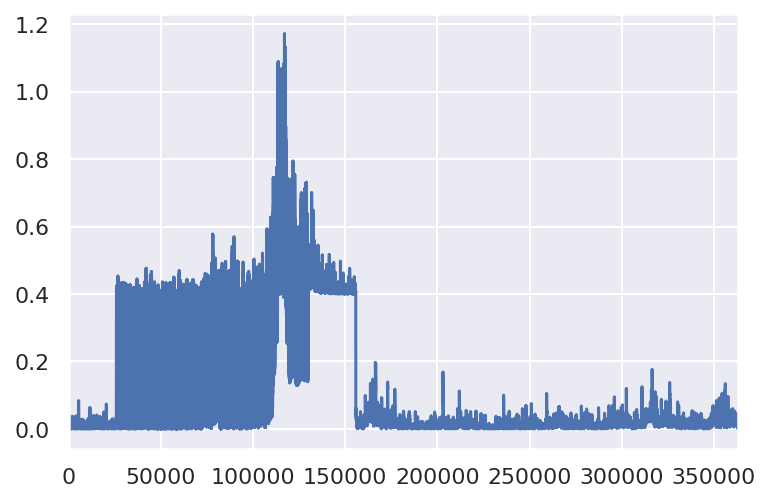

In [3]:
df11 = pd.read_csv('./anomaly_final_four/data/load_1min_val_83k_changeofpoint_sm_try_out.csv')
df11.head()
df11['actual_value'].plot()

In [4]:
df12 = df11.copy()
df12.index = pd.to_datetime(df12.timestamp)
df12.sort_index(ascending=True, inplace=True)
df12.head()

timestamp  actual_value  prediction  \
timestamp                                                                       
2019-03-31 18:00:03.066  2019-03-31 18:00:03.066000           0.0         0.0   
2019-03-31 18:00:03.066  2019-03-31 18:00:03.066000           0.0         0.0   
2019-03-31 18:00:03.066  2019-03-31 18:00:03.066000           0.0         0.0   
2019-03-31 18:00:03.066  2019-03-31 18:00:03.066000           0.0         0.0   
2019-03-31 18:00:03.066  2019-03-31 18:00:03.066000           0.0         0.0   

                         anomaly_score  anomaly_likelihood  
timestamp                                                   
2019-03-31 18:00:03.066            1.0                 0.5  
2019-03-31 18:00:03.066            1.0                 0.5  
2019-03-31 18:00:03.066            1.0                 0.5  
2019-03-31 18:00:03.066            0.0                 0.5  
2019-03-31 18:00:03.066            0.0                 0.5

In [10]:
non_anom = df12[df12['anomaly_likelihood']<=0.9999999999999]['actual_value']
anom = df12[df12['anomaly_likelihood']>0.9999999999999]['actual_value']

print(len(anom))

8


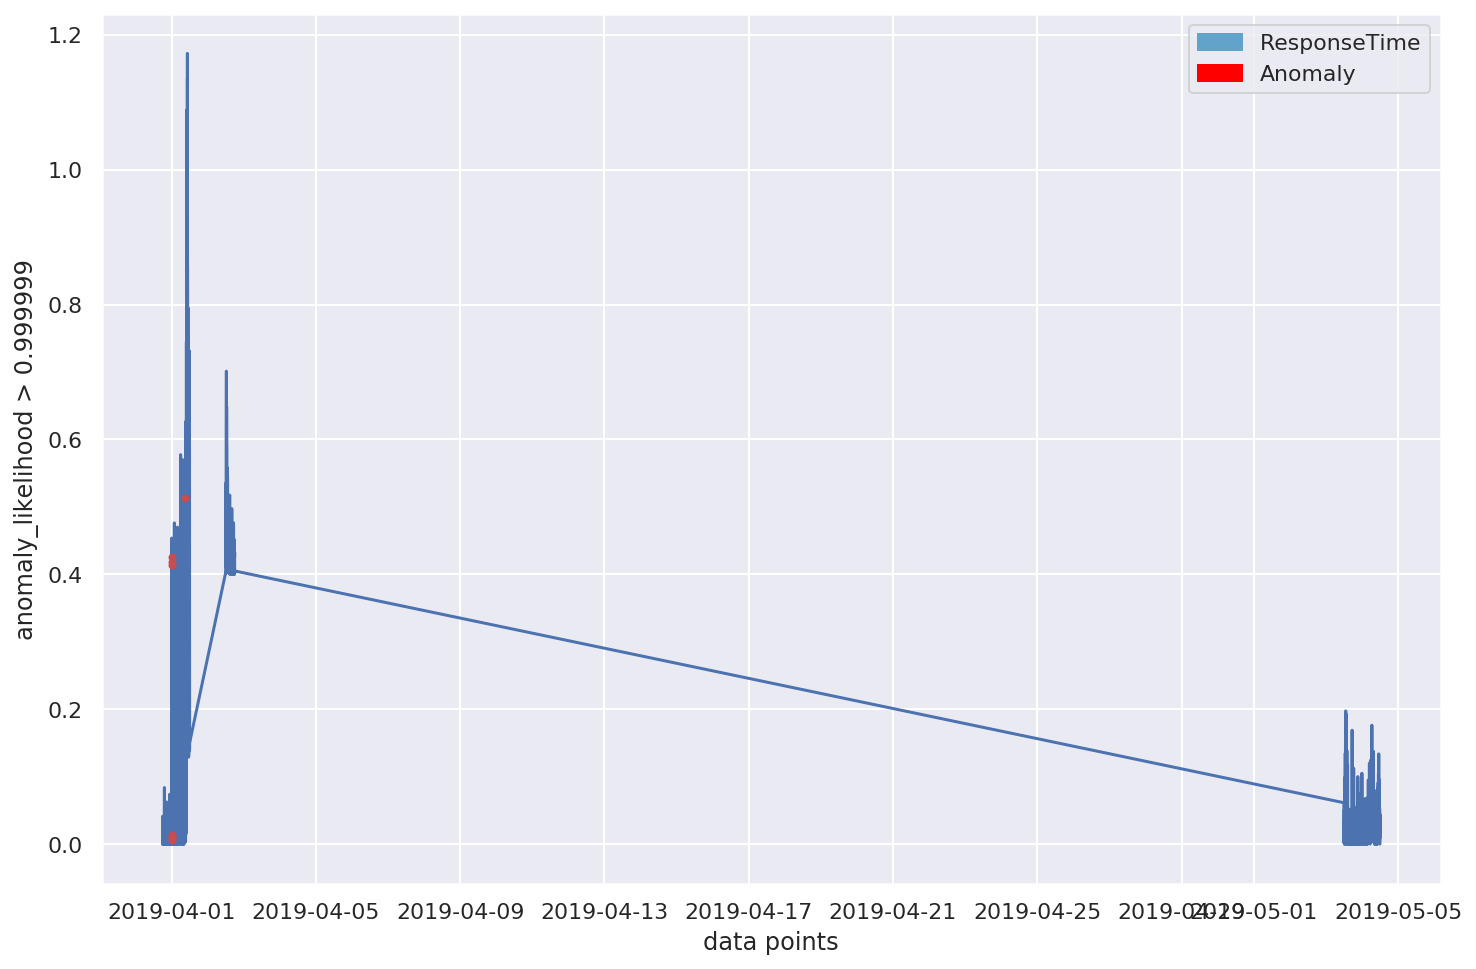

In [11]:
plt.figure(figsize = (12,8))
plt.plot(non_anom, linestyle = '-', label ='ResponseTime')
plt.plot(anom, 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('anomaly_likelihood > 0.999999')
plt.xlabel('data points')
plt.show()

In [39]:
# As for testing purpose, i have created data from different time step, 
# so i have to remove date as index in order to plot sequence of points.

non_anom = df11[df11['anomaly_likelihood']<=0.9999999]['actual_value']#0.9999999999999, 0.99999999
anom = df11[df11['anomaly_likelihood']>0.9999999]['actual_value']

print(len(anom))

49


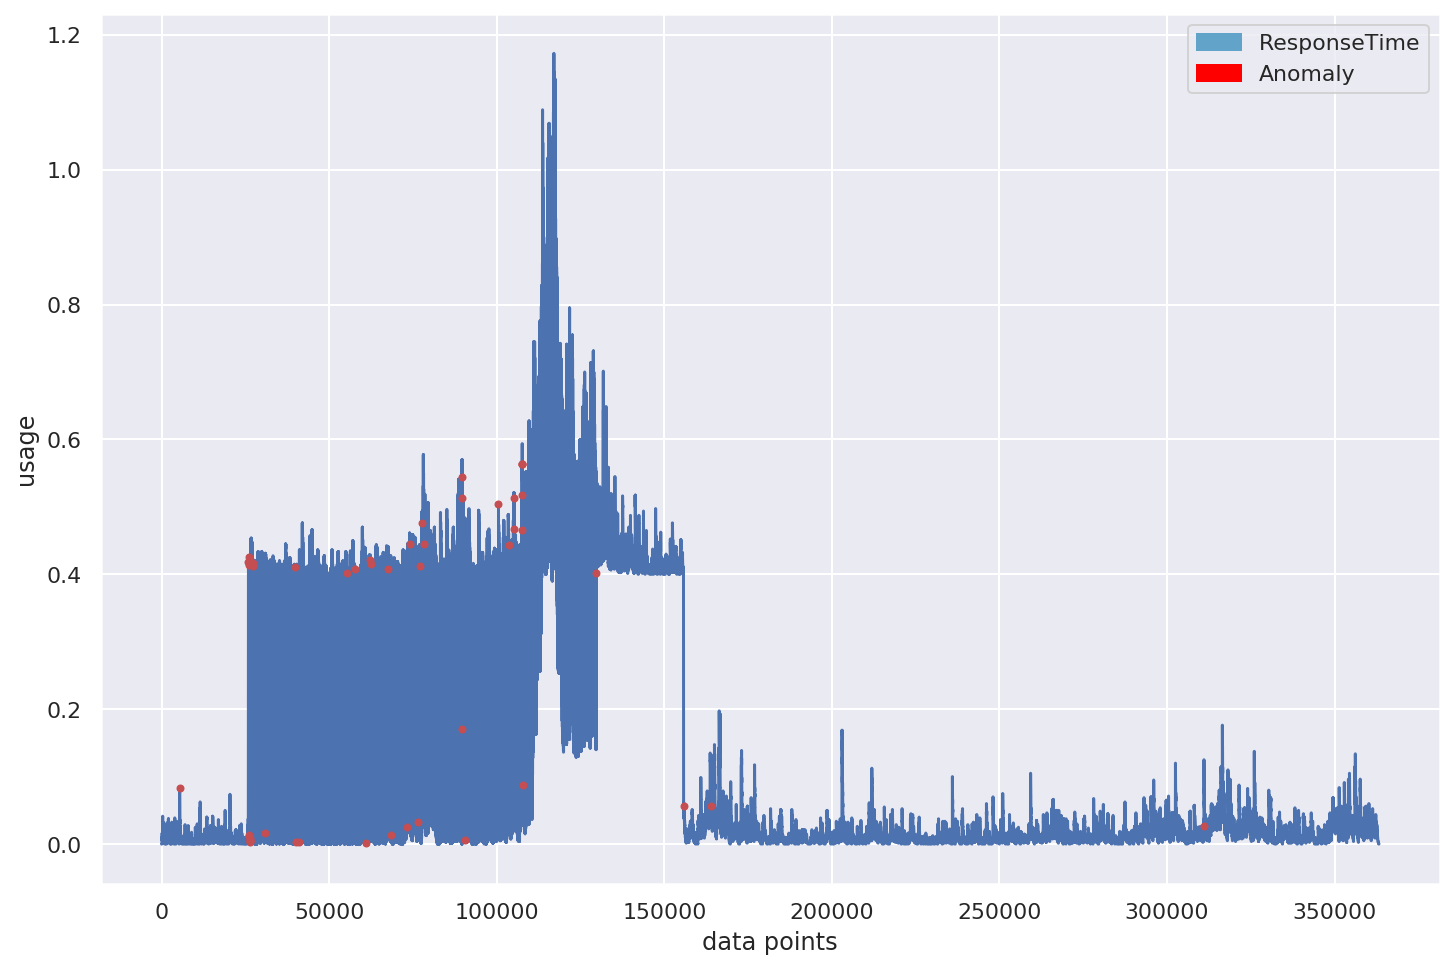

In [40]:
plt.figure(figsize = (12,8))
plt.plot(non_anom, linestyle = '-', label ='ResponseTime')
plt.plot(anom, 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('usage')
plt.xlabel('data points')
plt.show()

# More Insights

In [33]:
anom

25921     0.4188
25971     0.0138
25988     0.0113
25991     0.4138
26133     0.4250
26279     0.0088
26315     0.0063
26343     0.0050
26368     0.0050
26376     0.0038
26466     0.4200
27240     0.4125
30767     0.0163
73135     0.0250
74163     0.4450
100517    0.5038
103604    0.4438
105187    0.5125
105248    0.4675
107593    0.5638
107618    0.5638
107683    0.5175
311015    0.0263
Name: actual_value, dtype: float64

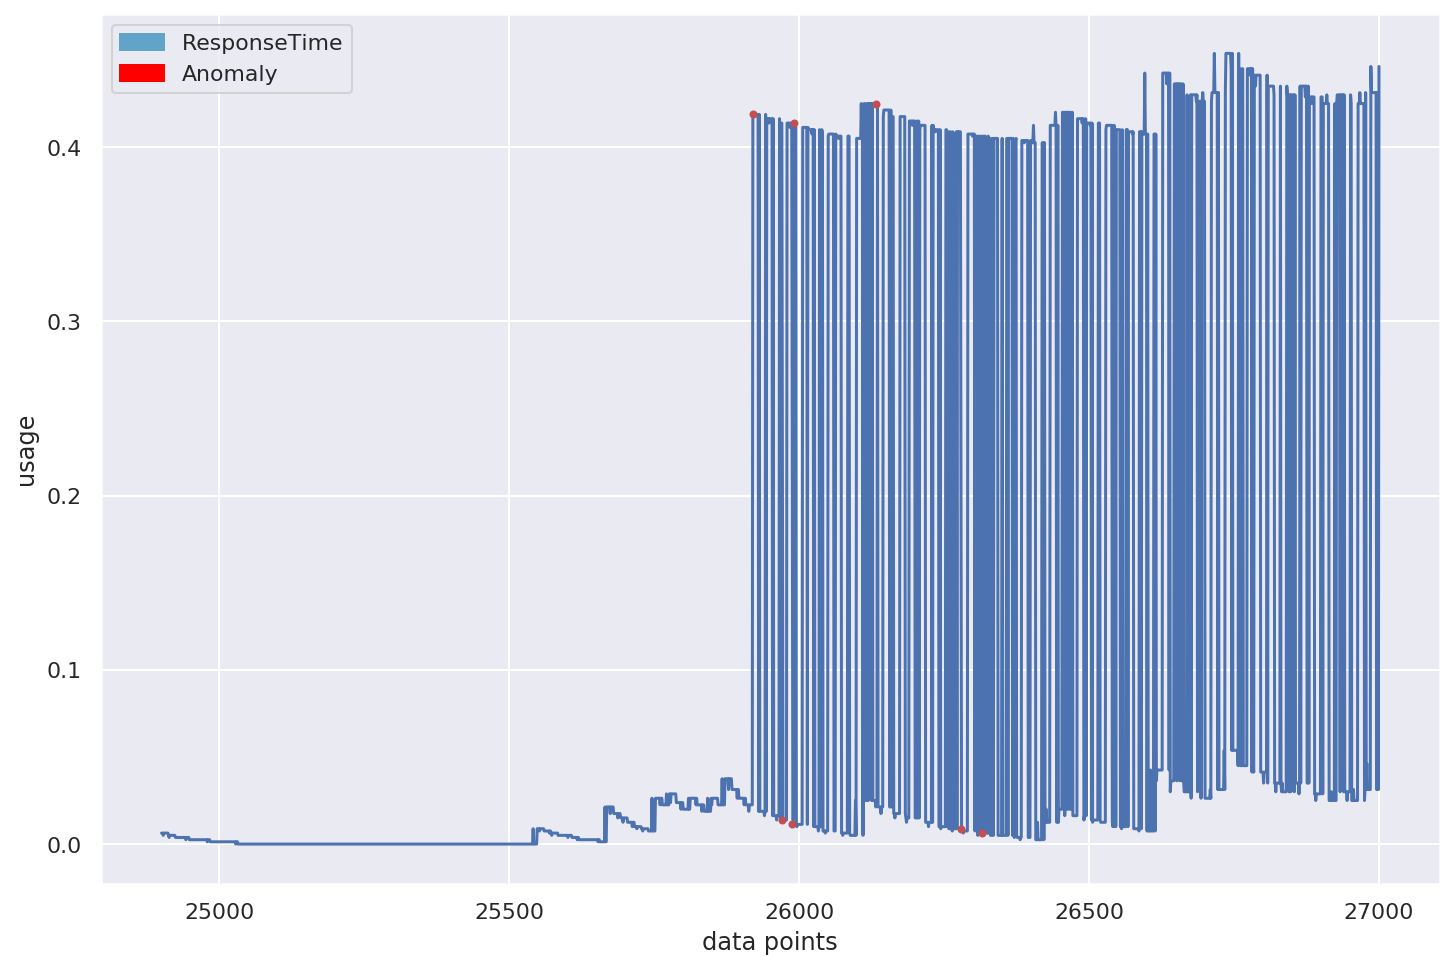

In [21]:
plt.figure(figsize = (12,8))
plt.plot(non_anom.loc[24900:27000], linestyle = '-', label ='ResponseTime')
plt.plot(anom.loc[24900:27000], 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('usage')
plt.xlabel('data points')
plt.show()

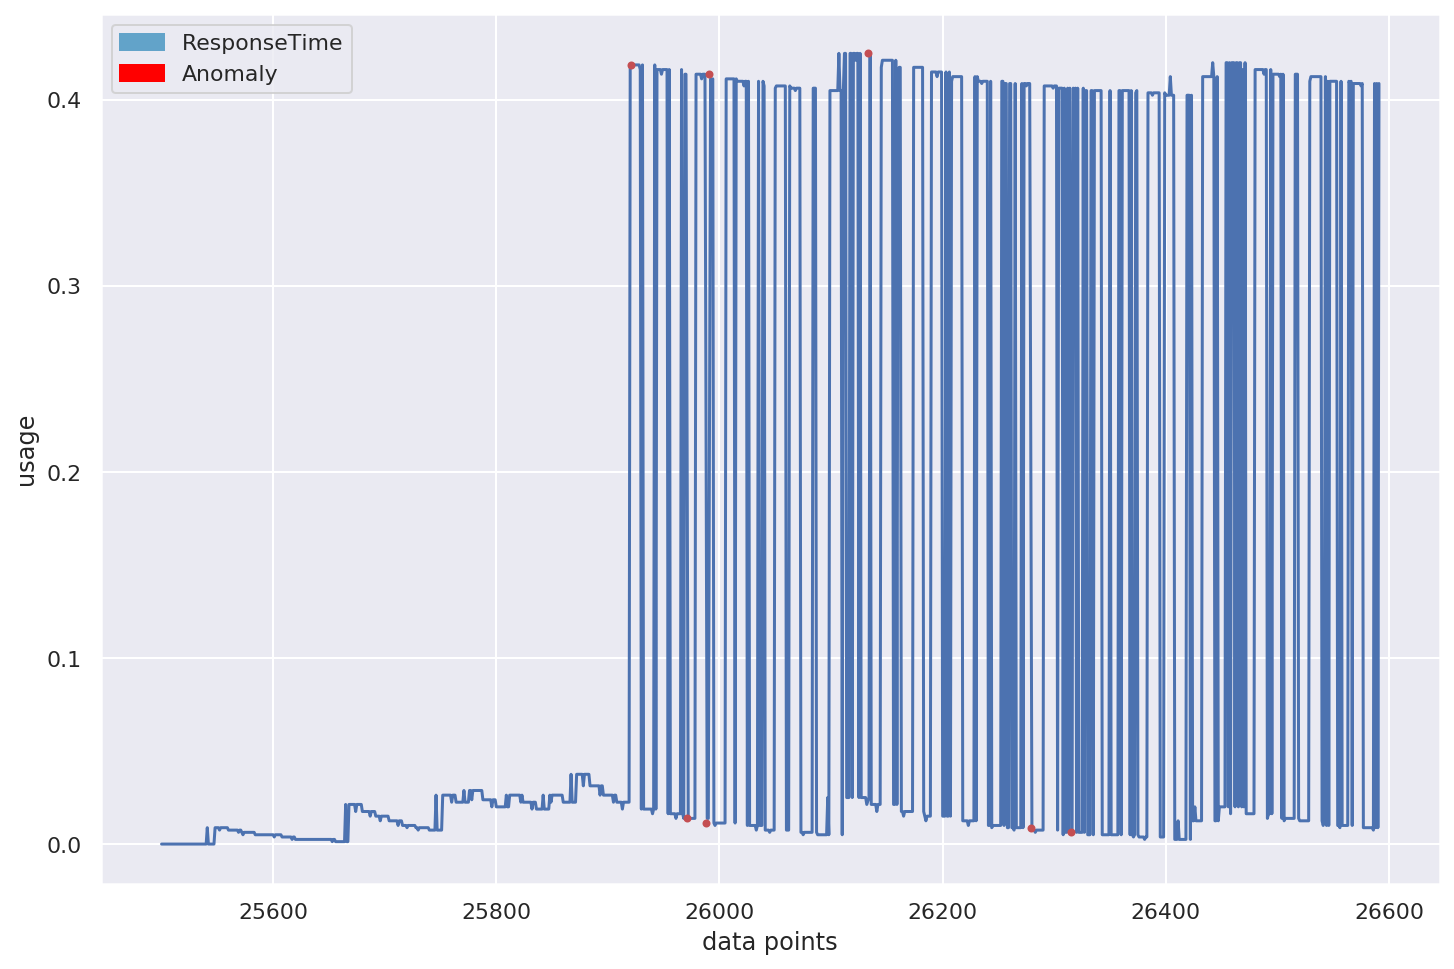

In [23]:
plt.figure(figsize = (12,8))
plt.plot(non_anom.loc[25500:26591], linestyle = '-', label ='ResponseTime')
plt.plot(anom.loc[25500:26591], 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('usage')
plt.xlabel('data points')
plt.show()

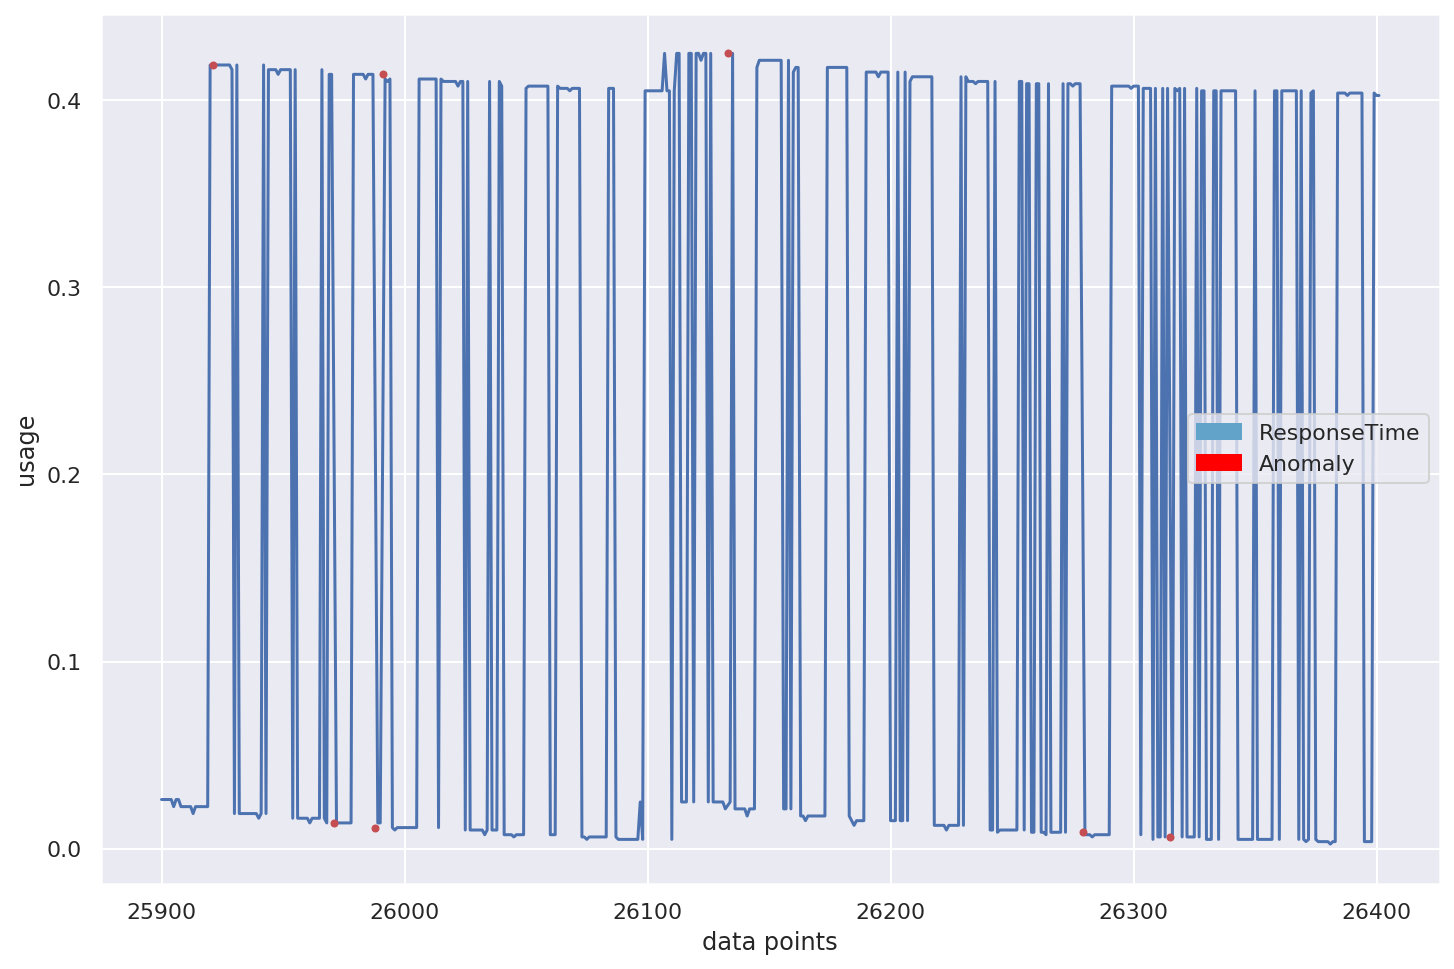

In [25]:
plt.figure(figsize = (12,8))
plt.plot(non_anom.loc[25900:26401], linestyle = '-', label ='ResponseTime')
plt.plot(anom.loc[25900:26401], 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('usage')
plt.xlabel('data points')
plt.show()

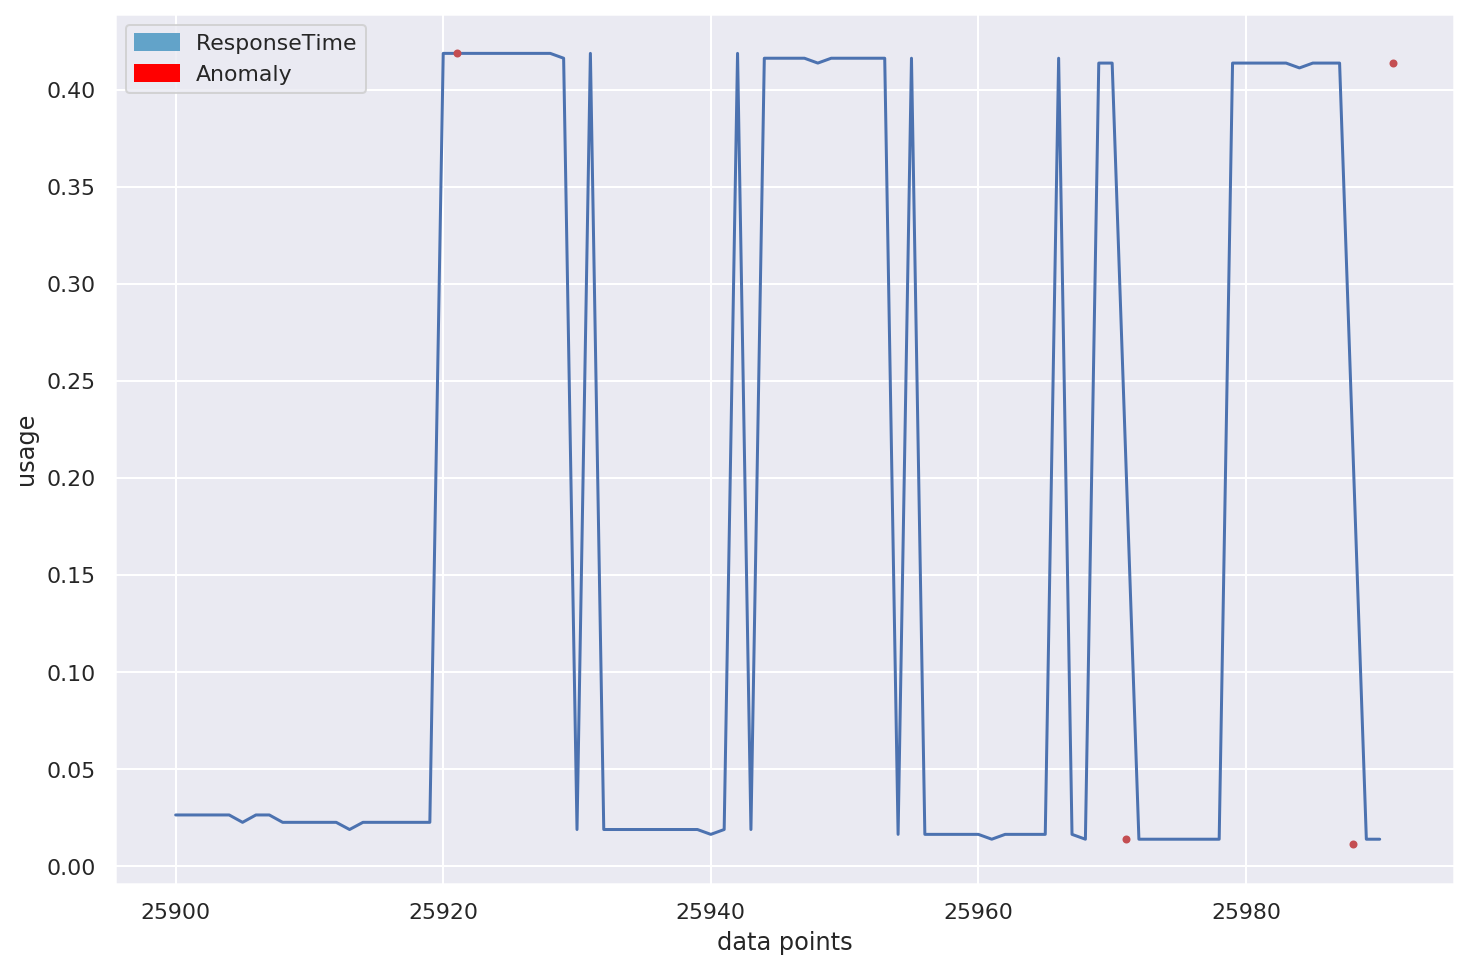

In [19]:
plt.figure(figsize = (12,8))
plt.plot(non_anom.loc[25900:25991], linestyle = '-', label ='ResponseTime')
plt.plot(anom.loc[25900:25991], 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('usage')
plt.xlabel('data points')
plt.show()

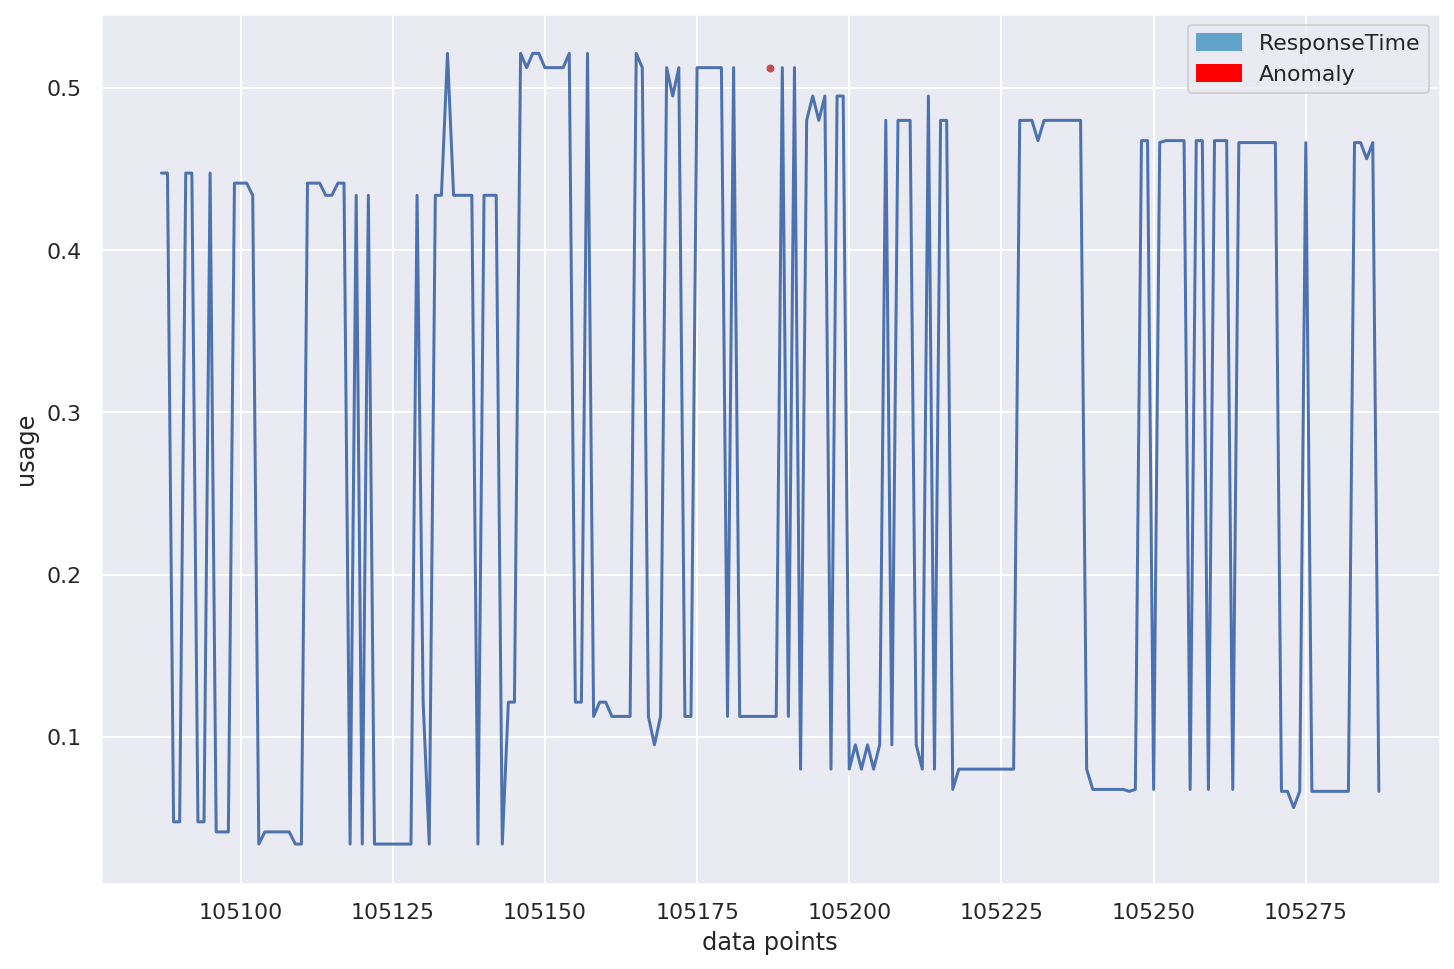

In [26]:
plt.figure(figsize = (12,8))
plt.plot(non_anom.loc[105087:105287], linestyle = '-', label ='ResponseTime')
plt.plot(anom.loc[105087:105287], 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('usage')
plt.xlabel('data points')
plt.show()

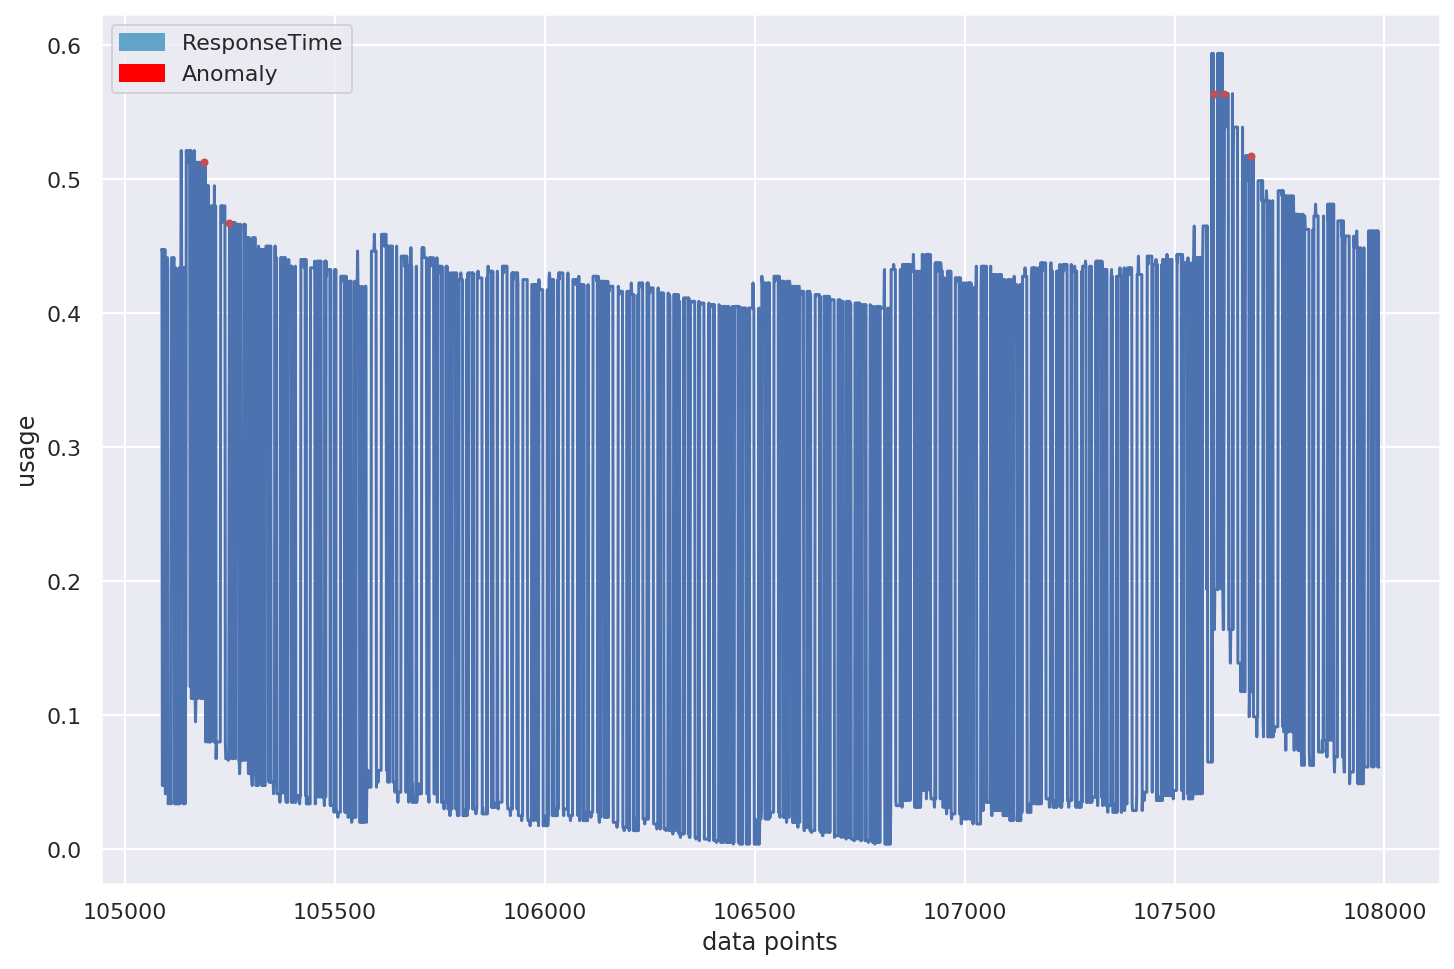

In [35]:
plt.figure(figsize = (12,8))
plt.plot(non_anom.loc[105087:107987], linestyle = '-', label ='ResponseTime')
plt.plot(anom.loc[105087:107987], 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('usage')
plt.xlabel('data points')
plt.show()

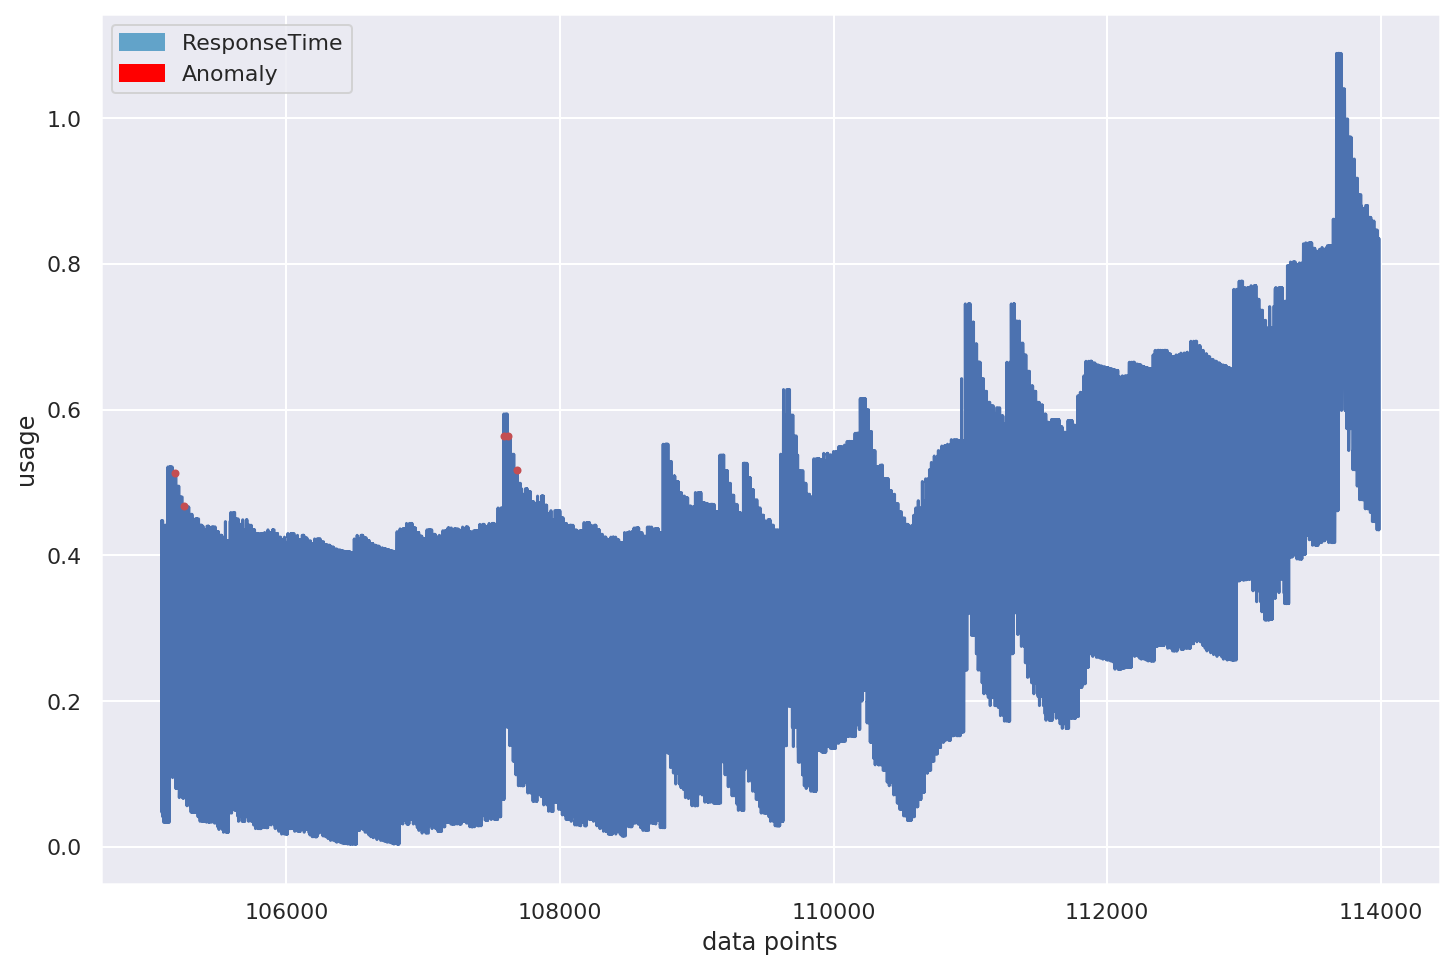

In [37]:
plt.figure(figsize = (12,8))
plt.plot(non_anom.loc[105087:113987], linestyle = '-', label ='ResponseTime')
plt.plot(anom.loc[105087:113987], 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('usage')
plt.xlabel('data points')
plt.show()

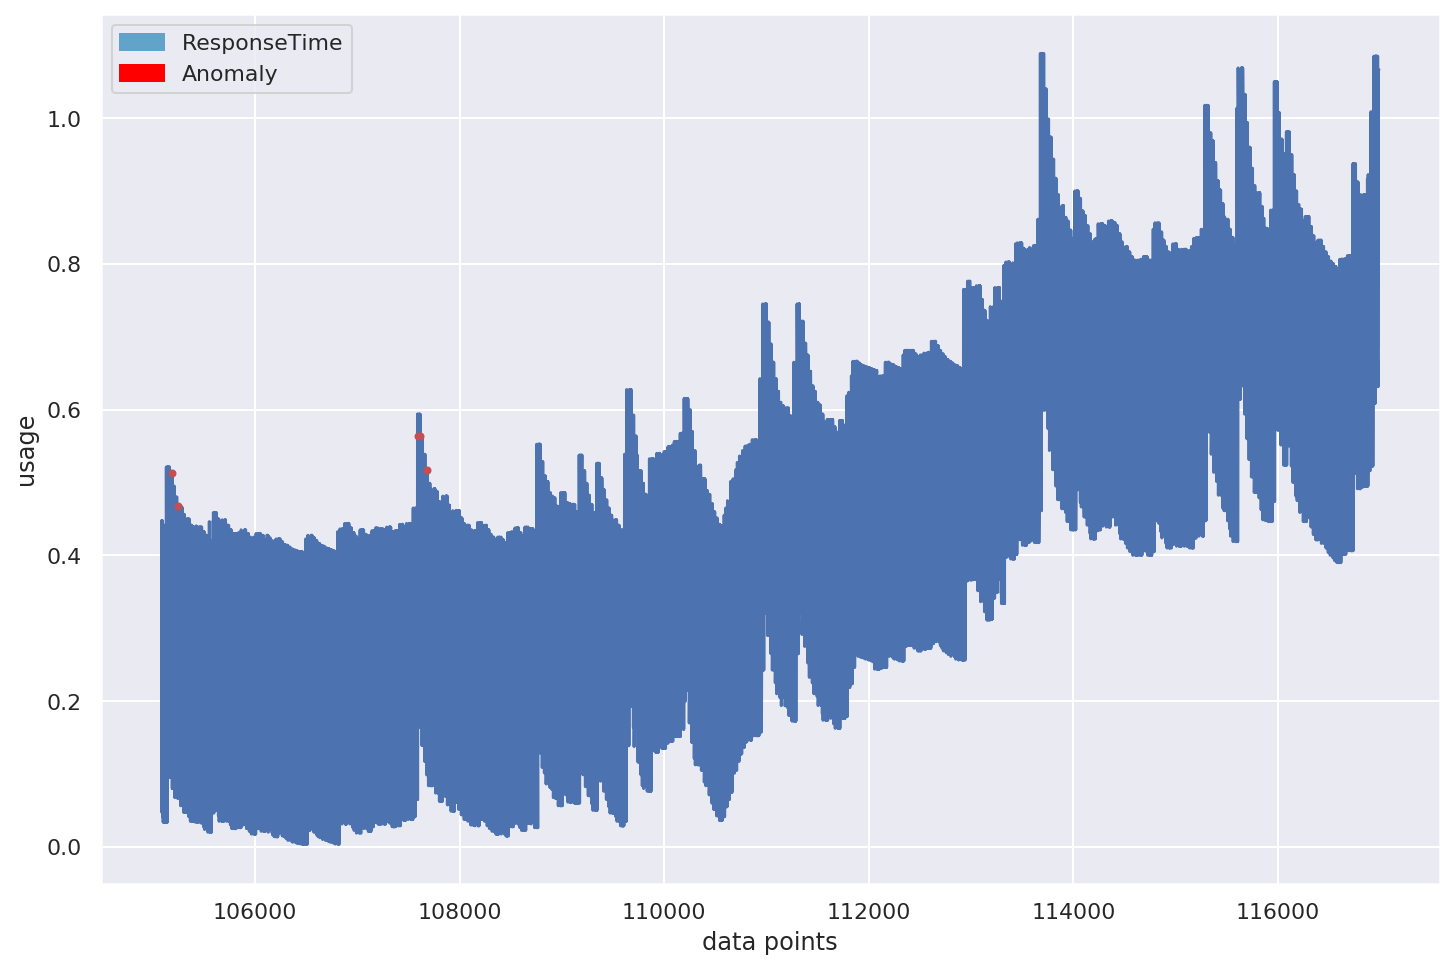

In [38]:
plt.figure(figsize = (12,8))
plt.plot(non_anom.loc[105087:116987], linestyle = '-', label ='ResponseTime')
plt.plot(anom.loc[105087:116987], 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('usage')
plt.xlabel('data points')
plt.show()

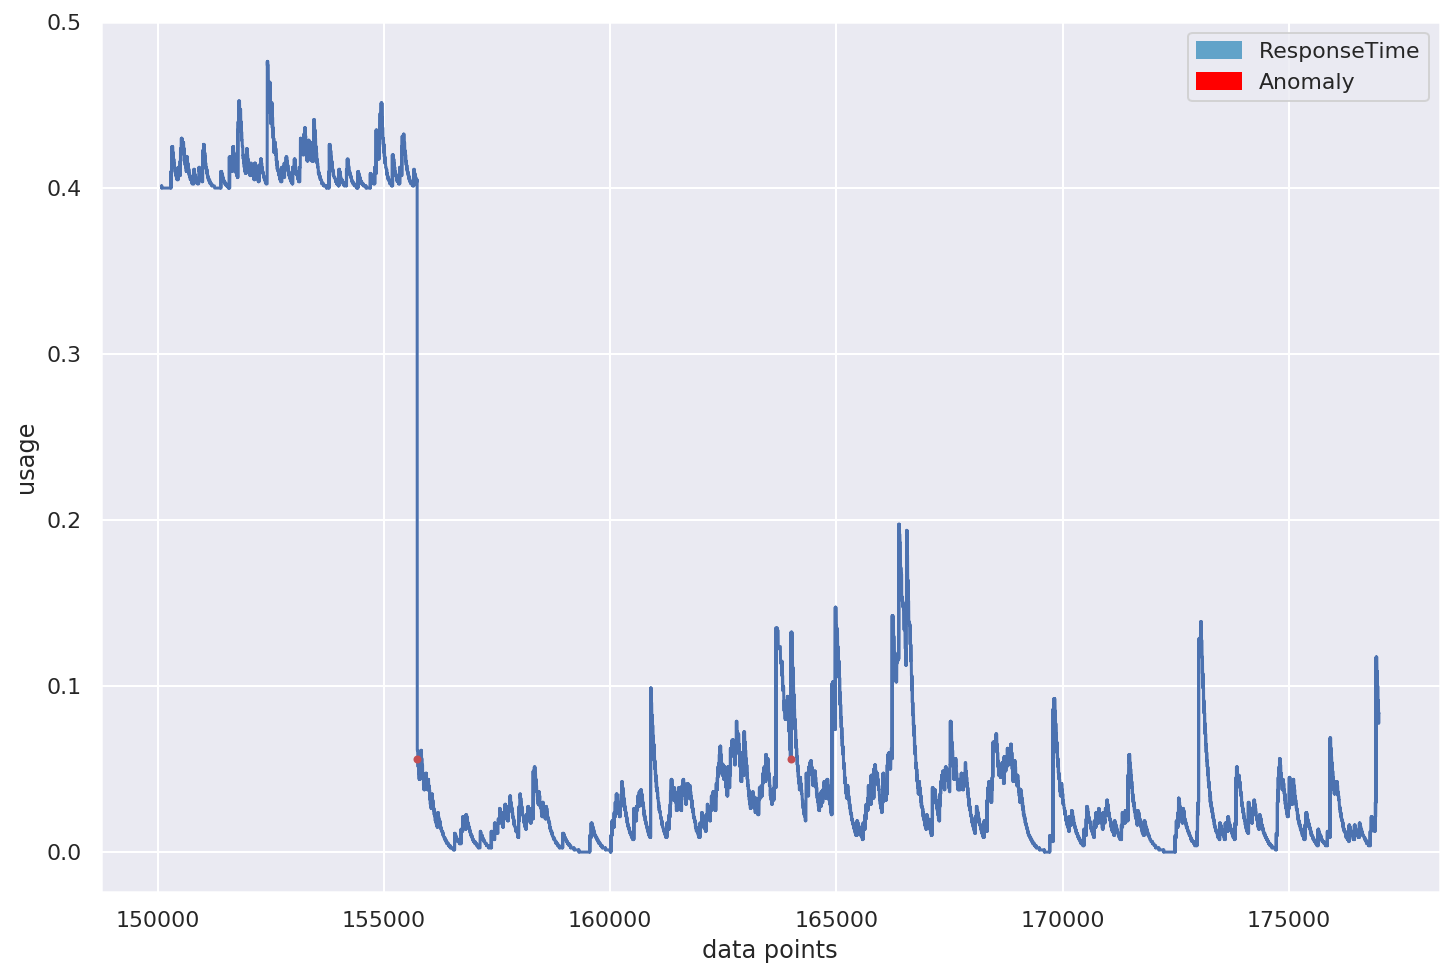

In [41]:
plt.figure(figsize = (12,8))
plt.plot(non_anom.loc[150087:176987], linestyle = '-', label ='ResponseTime')
plt.plot(anom.loc[150087:176987], 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('usage')
plt.xlabel('data points')
plt.show()

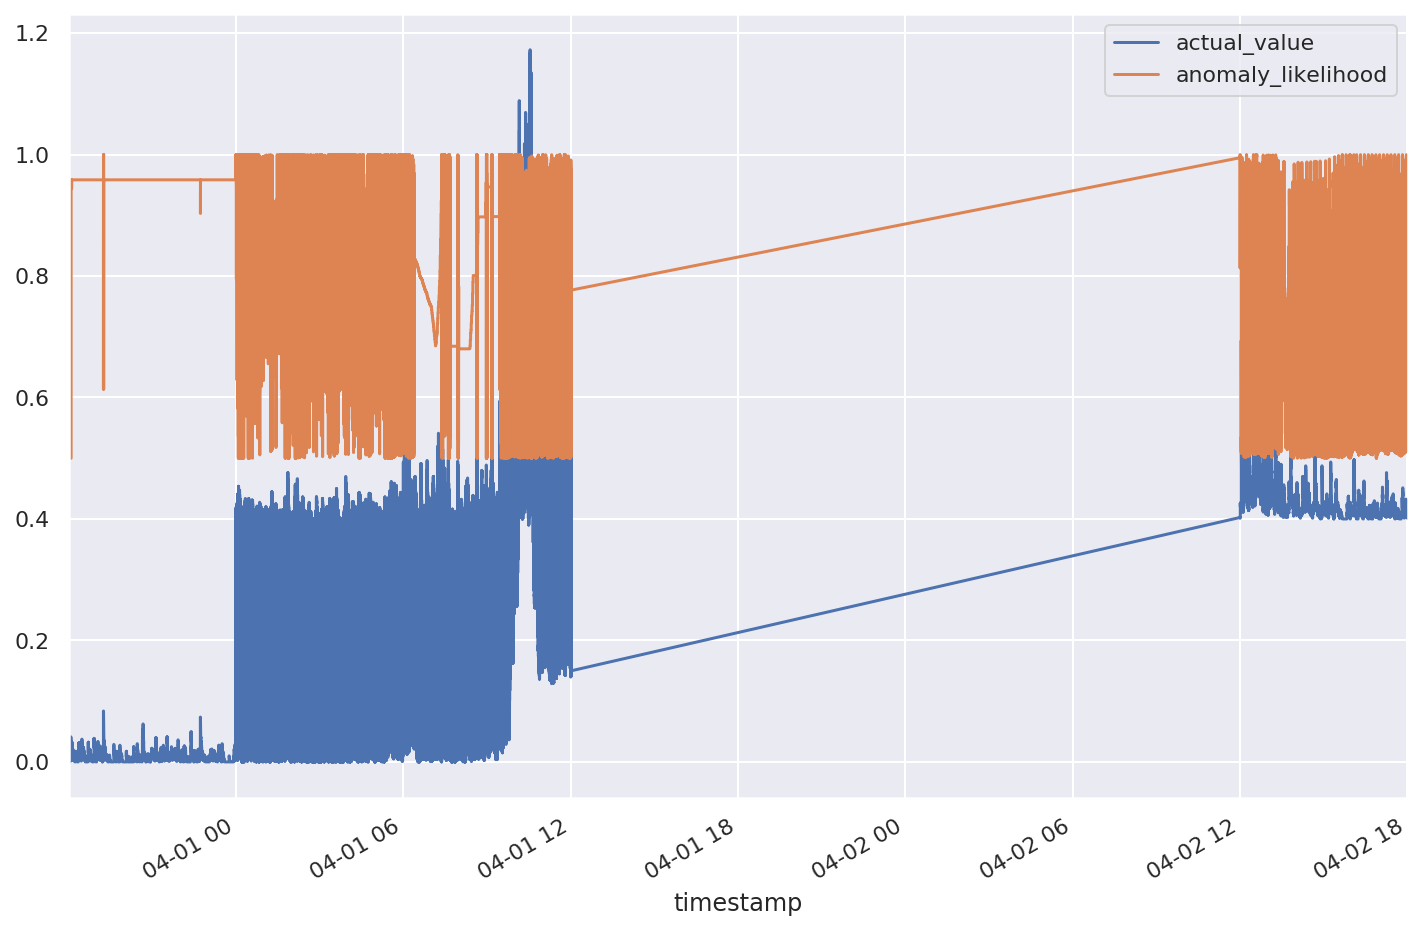

In [27]:
df12.loc['2019-03-31 12:00':'2019-04-03 14:30'][['actual_value','anomaly_likelihood']].plot(figsize=(12,8))

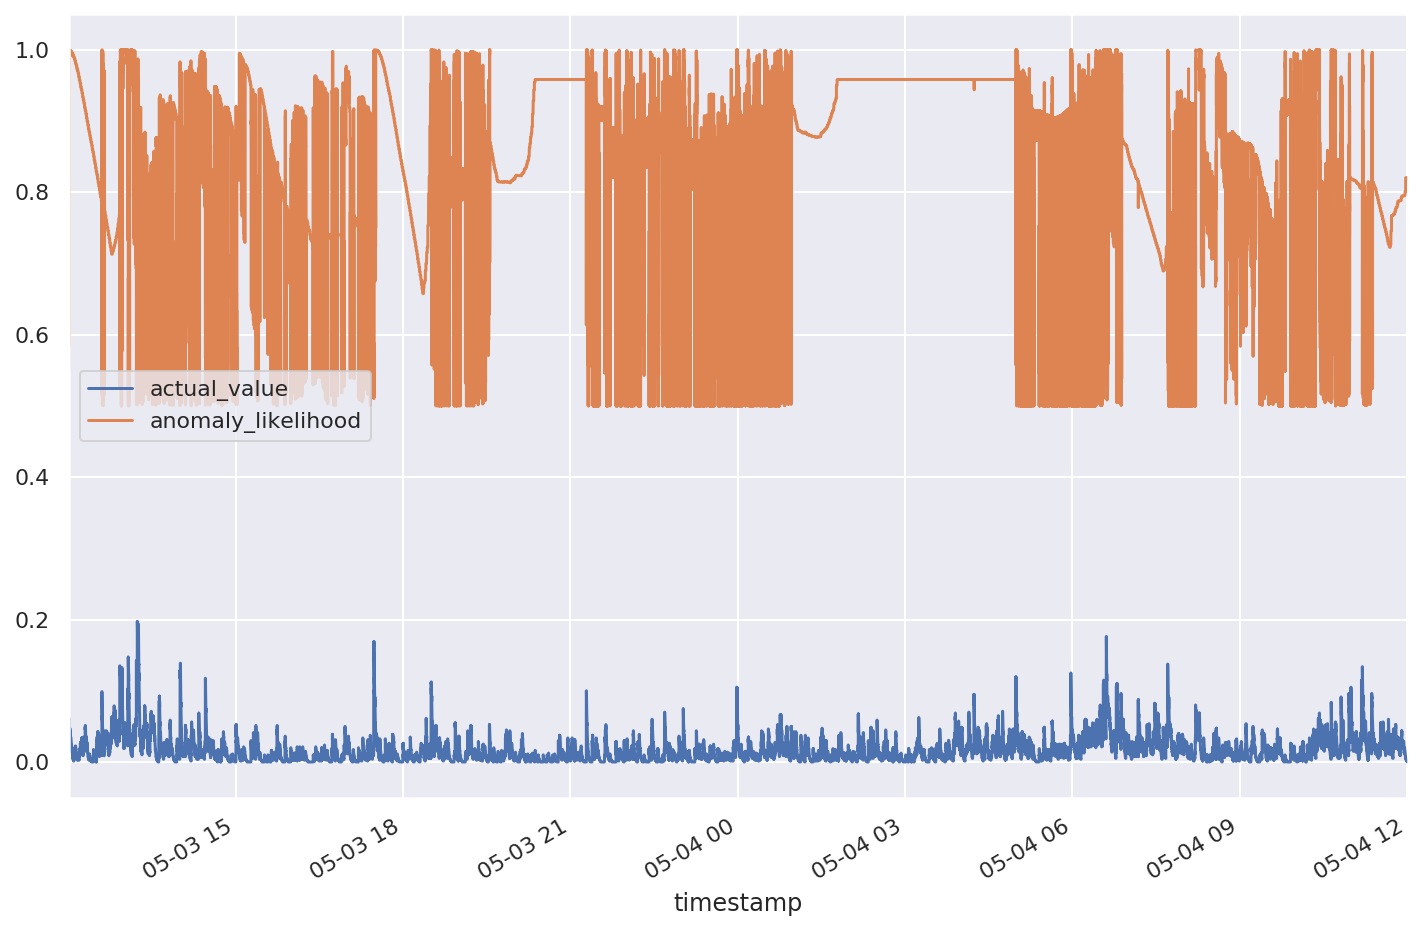

In [28]:
df12.loc['2019-04-03 14:30':'2019-05-05 14:30'][['actual_value','anomaly_likelihood']].plot(figsize=(12,8))

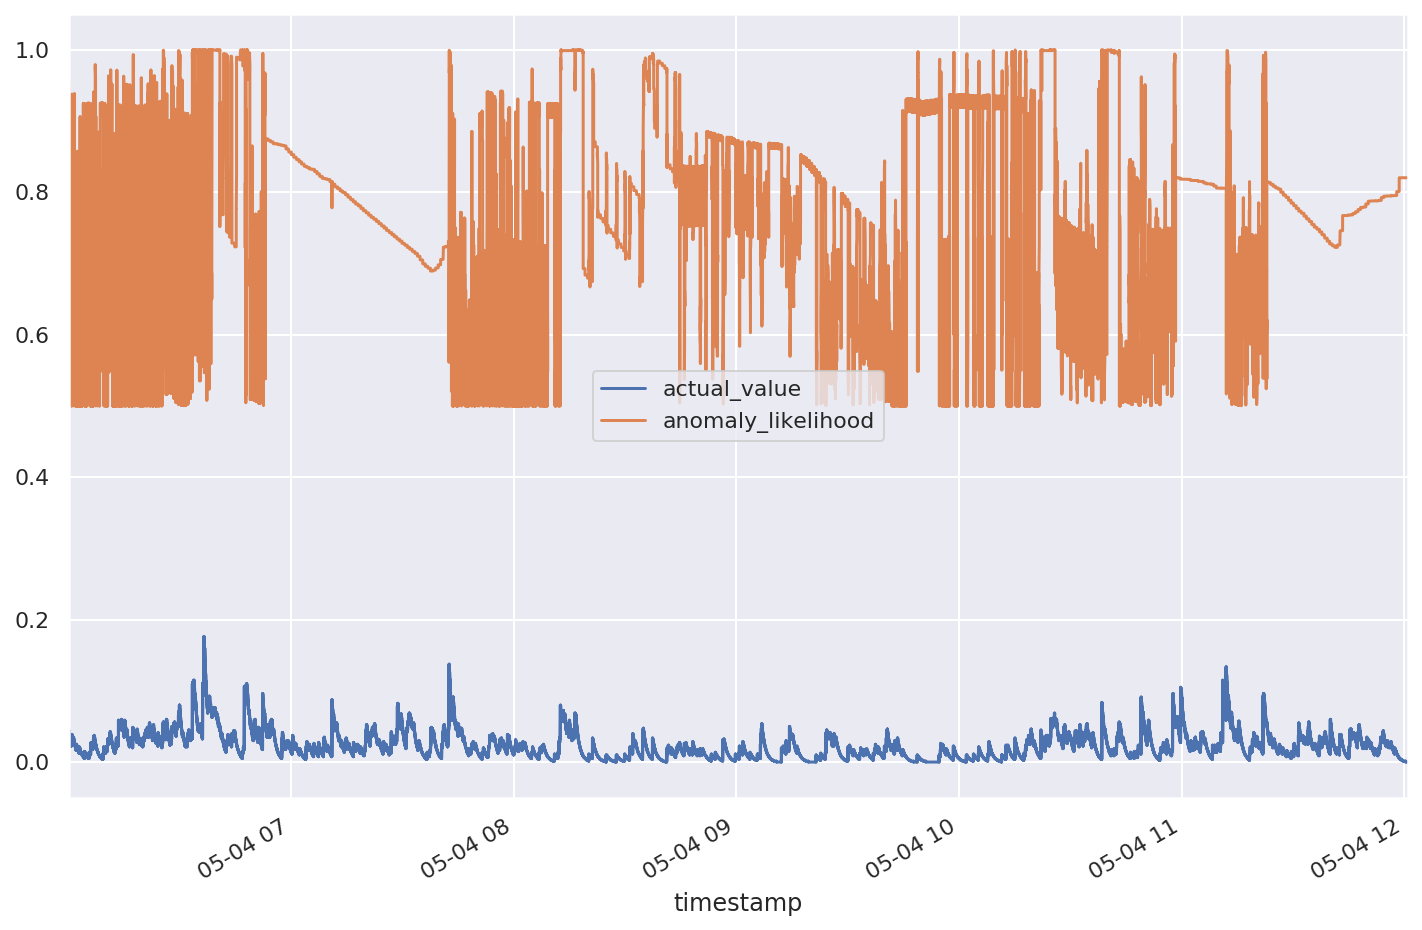

In [30]:
df12.loc['2019-05-04 06:00':'2019-05-05 14:30'][['actual_value','anomaly_likelihood']].plot(figsize=(12,8))